In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [148]:
df = pd.read_csv('lteFaults_churnmodel_anonymized_new.csv')

In [149]:
df.shape

(45216, 12)

In [150]:
# Checking duplicated records
df.duplicated()
#df[df.duplicated()]

0        False
1        False
2        False
3        False
4        False
         ...  
45211    False
45212    False
45213    False
45214    False
45215    False
Length: 45216, dtype: bool

In [151]:
# Number of null values in each column
df.isnull().sum()

accnumber_HASH               0
event_source                 0
faultRef_HASH                0
opmc_name                  155
lea_code                   183
cirt_sert_abbreviation       0
fault_in                  3885
sub_category                 0
category                   367
cleared_time               438
reported_time                0
ym                           0
dtype: int64

In [152]:
# drop missing values in cleared_time column
df.dropna(subset=["cleared_time"], inplace=True)

In [153]:
df.shape

(44778, 12)

In [154]:
df.faultRef_HASH.value_counts()

442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b9722f4bf4a5001fe89bc    544
81256b6a28e668c2d728500d116c7b14884f5a6de66cb622e3952a2f3603e75a    334
a5fa82632351942a2148e7b6886b1189724d798ddf58c42f41c5031993a788e4    168
4dcd07ef0778e2a893eea9b1bd4b0be20c78f3f77cf014356c86201a84b38371    168
9257c0d2a21de4a379d19865ac72d4d1fe7925d42078d99a21203fd0ee4c98ff    107
                                                                   ... 
3b50cfb219196c6e442d09ca32d411bb97c0eeff44b73200e51644f83fa2c2f5      1
a4f81e33d3e1766648fed373e0e51fa56b5dc146ad1e4d08f2497adf6a8890ab      1
e09bc56baead57ff33a8294066b2ecf0bda350fcff15432c02f7d0ccbc539d61      1
b2e7b054d12fd8a8df79ab2793f9b71703b066a4de2d1b8c30864d5b64f9fc21      1
38945f38d7e65d4d598ff0700677161759f05d201b3ab94442d5db8f1845ea98      1
Name: faultRef_HASH, Length: 30453, dtype: int64

In [155]:
df[df.faultRef_HASH=='442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b9722f4bf4a5001fe89bc'].head(50)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,reported_time,ym
2769,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112322985,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2770,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112323444,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2771,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112324188,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2772,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112326208,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2773,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112327082,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2774,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112327734,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2775,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112327843,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2776,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112329822,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2777,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112334041,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203
2778,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112334093,442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b97...,MD,CEN,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-03-31 22:49:55,2022-03-31 21:52:01,202203


In [156]:
df[df.fault_in=='801-NODE ISOLATED']

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,reported_time,ym
15,082dc4aa69ca3cc043001787b533bed40217ba08c25359...,IPTV0112171481,05edda2010ce90e7b65262dfe860fc189c4dc2d129a331...,KX,KX,E-IPTV COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-02-26 10:56:31,2022-02-26 09:58:22,202202
21,c6336c2fcdfc7fcdfcd04a3ee371070af8ec93b352004a...,94473129751,c7661b3797eaf4b21a608b39a42dc7583c86741297cca4...,HB,ANK,BB-INTERNET,801-NODE ISOLATED,02-NO SVC-INTERNET,80-NETWORK,2022-02-27 10:07:21,2022-02-26 10:53:21,202202
47,c229aba0771bdf55559d55c886312b41a851201e89d8c7...,MB-ARP-NODE-MB-ARP-00003-CAB-0004,eac96f5fc2769a90703d1f54e835ed3099582428e2e25b...,MB,MB,AB-CAB,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-02-28 16:57:03,2022-02-28 16:04:39,202202
74,5fa16298a4c93bd82358b4b4319264ce0e8892c5013af7...,0112945676,592dc81bb5a15aacac7eb263208da1270cee1785d42644...,RG,WT,V-VOICE COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-02-25 17:26:45,2022-02-25 16:32:10,202202
91,5eee5f3990e7273c72dc036ea66d1453472dd591cc584f...,94453121790,efb55f50edd626136aedc1834e178dddc0c0702dfe6192...,RN,BG,BB-INTERNET,801-NODE ISOLATED,99-OUT OF ORDER,80-NETWORK,2022-02-10 11:59:56,2022-02-10 11:30:03,202202
...,...,...,...,...,...,...,...,...,...,...,...,...
44997,cc6e0e5c0172dd41180071e6b1123eb4e8da50ca78f5d8...,94253128879,767811f11607f86c1e5dbcc7168a551d5bd16a3ccc0fe2...,KG,GGM,BB-INTERNET,801-NODE ISOLATED,02-NO SVC-INTERNET,80-NETWORK,2022-05-02 13:03:08,2022-05-02 11:57:01,202205
45001,5f59ffcb922cdb599d3768a772bbbe5254016da65a4256...,94573130394,6cced8c12a6f37ba5a4da2da23e88c26e91e08721cdf03...,NW,NW,BB-INTERNET,801-NODE ISOLATED,02-NO SVC-INTERNET,80-NETWORK,2022-05-07 16:34:31,2022-05-07 09:39:52,202205
45009,8b6f0193363f2d104578b9eafd79324f84d54e4b051f14...,94573128960,a622adbddc24767dac1760288b412df236b320fc0a17d8...,BW,BW,BB-INTERNET,801-NODE ISOLATED,02-NO SVC-INTERNET,80-NETWORK,2022-05-19 15:03:50,2022-05-19 07:30:59,202205
45028,84728ec8b022e8c1d574d931b151a429a47fe96085816e...,94453130036,bd8d1459a2044308663fcff8027506b0b71c138e2bb528...,RN,EH,BB-INTERNET,801-NODE ISOLATED,02-NO SVC-INTERNET,80-NETWORK,2022-05-28 09:20:53,2022-05-27 09:44:31,202205


In [157]:
df.dtypes

accnumber_HASH            object
event_source              object
faultRef_HASH             object
opmc_name                 object
lea_code                  object
cirt_sert_abbreviation    object
fault_in                  object
sub_category              object
category                  object
cleared_time              object
reported_time             object
ym                         int64
dtype: object

In [158]:
# change the data type to datetime
df['cleared_time'] = pd.to_datetime(df['cleared_time'])
df['reported_time'] = pd.to_datetime(df['reported_time'])

In [159]:
df['clearance_time'] = (df['cleared_time'] - df['reported_time'])

In [160]:
df.dtypes

accnumber_HASH                     object
event_source                       object
faultRef_HASH                      object
opmc_name                          object
lea_code                           object
cirt_sert_abbreviation             object
fault_in                           object
sub_category                       object
category                           object
cleared_time               datetime64[ns]
reported_time              datetime64[ns]
ym                                  int64
clearance_time            timedelta64[ns]
dtype: object

In [161]:
df['clearance_time'].describe()

count                         44778
mean      0 days 23:56:48.917727455
std      13 days 03:06:48.949943401
min                 0 days 00:00:12
25%          0 days 01:33:34.500000
50%                 0 days 03:52:51
75%          0 days 15:36:43.500000
max               590 days 00:44:36
Name: clearance_time, dtype: object

In [162]:
df[df['accnumber_HASH']=='8156cd012cb0053552ac495f0bc0b7997f09a1ed494b375959224baf3d123c0a']

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,reported_time,ym,clearance_time
9288,8156cd012cb0053552ac495f0bc0b7997f09a1ed494b37...,94333146988,a72b03426d7a7c7831b0b84ddf4120ba7e65dadc001338...,MD,CEN,BB-INTERNET,15-RWT RIGHT WHEN CHECKED,26-V-APP_PORTAL ISSUES,D01-CUSTOMER,2022-02-18 14:05:48,2020-07-08 13:21:12,202202,590 days 00:44:36
27417,8156cd012cb0053552ac495f0bc0b7997f09a1ed494b37...,94333146988,78d893be4d4b41bc57f060d8748580a2be02001e5d139c...,RM,RM,BB-INTERNET,802-POOR SIGNAL STRENGTH,02-NO SVC-INTERNET,80-NETWORK,2022-06-11 11:06:32,2022-06-11 03:24:07,202206,0 days 07:42:25
33307,8156cd012cb0053552ac495f0bc0b7997f09a1ed494b37...,94333146988,64f5f7f36ef406e26d9ede01d1ea8e6f936c6855b92e9e...,GQ,GE,BB-INTERNET,D01-08-OTHER (COMMENT ATTACHED),02-NO SVC-INTERNET,D01-CUSTOMER,2022-06-21 06:34:49,2022-06-16 11:51:50,202206,4 days 18:42:59


In [163]:
df.faultRef_HASH.value_counts()

442e4f7a21f8d72eda92db39000dcb7e3e38229bcf3b9722f4bf4a5001fe89bc    544
81256b6a28e668c2d728500d116c7b14884f5a6de66cb622e3952a2f3603e75a    334
a5fa82632351942a2148e7b6886b1189724d798ddf58c42f41c5031993a788e4    168
4dcd07ef0778e2a893eea9b1bd4b0be20c78f3f77cf014356c86201a84b38371    168
9257c0d2a21de4a379d19865ac72d4d1fe7925d42078d99a21203fd0ee4c98ff    107
                                                                   ... 
3b50cfb219196c6e442d09ca32d411bb97c0eeff44b73200e51644f83fa2c2f5      1
a4f81e33d3e1766648fed373e0e51fa56b5dc146ad1e4d08f2497adf6a8890ab      1
e09bc56baead57ff33a8294066b2ecf0bda350fcff15432c02f7d0ccbc539d61      1
b2e7b054d12fd8a8df79ab2793f9b71703b066a4de2d1b8c30864d5b64f9fc21      1
38945f38d7e65d4d598ff0700677161759f05d201b3ab94442d5db8f1845ea98      1
Name: faultRef_HASH, Length: 30453, dtype: int64

In [164]:
df['clearance_time_seconds'] = df['clearance_time'].dt.total_seconds()

In [165]:
df['clearance_time_days'] = df['clearance_time'].dt.days

In [166]:
df['reported_year'] = df['reported_time'].dt.year

In [167]:
df['Cleared_year'] = df['cleared_time'].dt.year

In [168]:
df['Cleared_time_month'] = df['ym'].astype(str).str[-2:]

In [169]:
df.shape

(44778, 18)

In [170]:
df.dtypes

accnumber_HASH                     object
event_source                       object
faultRef_HASH                      object
opmc_name                          object
lea_code                           object
cirt_sert_abbreviation             object
fault_in                           object
sub_category                       object
category                           object
cleared_time               datetime64[ns]
reported_time              datetime64[ns]
ym                                  int64
clearance_time            timedelta64[ns]
clearance_time_seconds            float64
clearance_time_days                 int64
reported_year                       int64
Cleared_year                        int64
Cleared_time_month                 object
dtype: object

In [171]:
df.head(4)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,reported_time,ym,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,2022-02-17 13:03:34,202202,0 days 03:47:02,13622.0,0,2022,2022,02
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,2022-02-11 11:02:32,202202,0 days 04:05:59,14759.0,0,2022,2022,02
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,2022-02-20 16:32:37,202202,0 days 16:56:55,61015.0,0,2022,2022,02
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,2022-02-13 17:39:20,202202,0 days 16:56:06,60966.0,0,2022,2022,02


In [172]:
df.clearance_time_days.min()

0

In [173]:
df.clearance_time.max()

Timedelta('590 days 00:44:36')

In [174]:
df1 = df[df['clearance_time_days']<= 15.0]
df1.shape

(44657, 18)

In [175]:
df1['clearance_time_days'] = df1['clearance_time_days'].astype(int)
df1.dtypes

C:\Users\SAsam\AppData\Local\Temp/ipykernel_11312/234130621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clearance_time_days'] = df1['clearance_time_days'].astype(int)


accnumber_HASH                     object
event_source                       object
faultRef_HASH                      object
opmc_name                          object
lea_code                           object
cirt_sert_abbreviation             object
fault_in                           object
sub_category                       object
category                           object
cleared_time               datetime64[ns]
reported_time              datetime64[ns]
ym                                  int64
clearance_time            timedelta64[ns]
clearance_time_seconds            float64
clearance_time_days                 int32
reported_year                       int64
Cleared_year                        int64
Cleared_time_month                 object
dtype: object

In [176]:
df1.clearance_time_days = df1.clearance_time_days+1

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


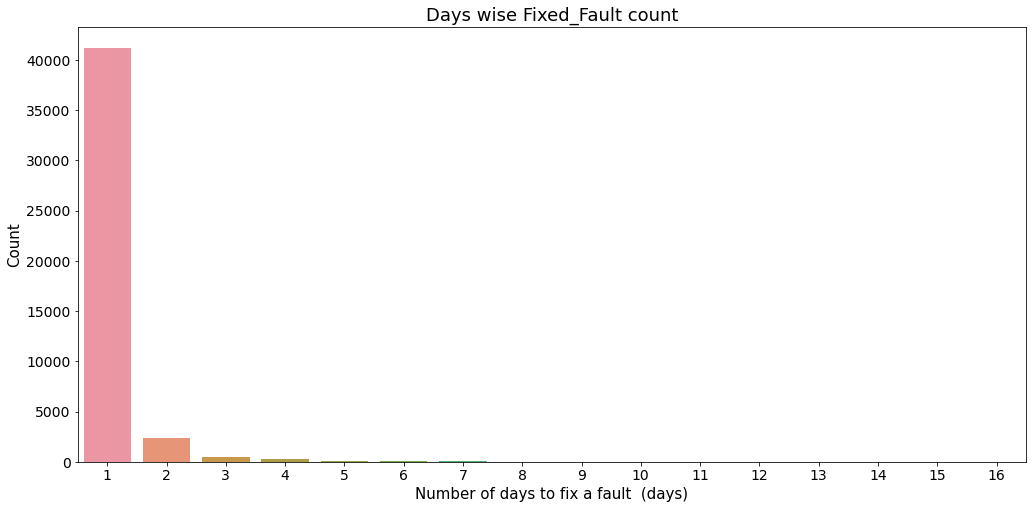

In [177]:
plt.figure(figsize=(17,8))
sns.countplot(df1['clearance_time_days'])
plt.xlabel("Number of days to fix a fault  (days)", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title("Days wise Fixed_Fault count", fontsize=18)
plt.tick_params(labelsize=14)
plt.show()

In [178]:
df1.clearance_time_days.value_counts().head(5)

1    41238
2     2331
3      503
4      240
5      117
Name: clearance_time_days, dtype: int64

In [179]:
df1[df1.clearance_time_days>5].shape

(228, 18)

In [180]:
conditions = [
    (df['clearance_time'] > '0 days' ) & (df['clearance_time'] <='1 days' ),
    (df['clearance_time'] > '1 days') & (df['clearance_time'] <= '2 days'),
    (df['clearance_time'] > '2 days') & (df['clearance_time'] <= '3 days'),
    (df['clearance_time'] > '3 days') & (df['clearance_time'] <= '4 days'),
    (df['clearance_time'] > '4 days') & (df['clearance_time'] <= '5 days'),
    (df['clearance_time'] > '5 days')

]

choices = ['within 1st day',
           'within 2nd day',
           'within 3rd day',
           'within 4th day',
           'within 5th day',
           'Over 5 days'
]

df['timeDiff'] = np.select(conditions, choices, 'over 5 days')
df.tail(10)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,reported_time,ym,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff
45206,fb743cf54208a7df9d6a2283779044732ef705993aa995...,0253129577,62f193b5a74d27a6974a33f589e064b962428860cb5e7d...,AD,EPA,V-VOICE,999-OTHER (REFER COMMENT),99-OUT OF ORDER,99-OTHER,2022-05-01 11:03:26,2022-04-30 15:18:56,202205,0 days 19:44:30,71070.0,0,2022,2022,05,within 1st day
45207,efea17987a218ba5db7976cfd9d82269c86f39d05398f5...,0373161320,7d5788e4ad7c742b1f839615e12a9ba87c4f332315d1c5...,KG,NDP,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-05-01 11:00:55,2022-04-30 15:47:37,202205,0 days 19:13:18,69198.0,0,2022,2022,05,within 1st day
45208,8d86c9bac8d3a82e6a40d2a76cfa4132fbb2d6de30db83...,LTE0813162306,6fd3e50dba52c9ca9fd0b17593c8fb73bf5b0b7128318a...,KY,KY,AB-WIRELESS ACCESS,999-OTHER (REFER COMMENT),04-NO SVC-TSTV,99-OTHER,2022-05-01 10:36:30,2022-04-30 16:23:42,202205,0 days 18:12:48,65568.0,0,2022,2022,05,within 1st day
45209,e3d77df6a3065e210d096be19d1d9c0508061c0bc5954c...,94413125439,b7fb8f84b484135fa0b958a330dacf10f565ca090097f5...,MH,MWK,BB-INTERNET,NaN,02-NO SVC-INTERNET,99-OTHER,2022-05-01 10:58:40,2022-04-30 17:48:10,202205,0 days 17:10:30,61830.0,0,2022,2022,05,within 1st day
45210,ccabdf965686a3b6ed078e43971005f9753fd840ac93b8...,94453131400,86351962e921f71b7f00ce526fc547e8b9417c5a549817...,RN,RN,BB-INTERNET,301-WRONG MODEM/ROUTER/ONT SETTINGS,02-NO SVC-INTERNET,30-CPE,2022-05-01 16:10:53,2022-04-30 19:22:42,202205,0 days 20:48:11,74891.0,0,2022,2022,05,within 1st day
45211,581d7a7db2b3db3b9dc428696e18cecb2b63d68e41edfe...,94333142447,9dafdc4757a3170bf517a28e13a8802fd5e46033d5e899...,MH,MH,BB-INTERNET,NaN,02-NO SVC-INTERNET,98-NO DEFECT FOUND,2022-05-02 16:20:30,2022-04-30 19:51:04,202205,1 days 20:29:26,160166.0,1,2022,2022,05,within 2nd day
45212,0149e52b35a6b05151efd43907606f0720affcbbaff162...,94113416224,61c56879d03992489ac9ad9b08ff6dec905a470e3f7ac2...,NG,KN,BB-INTERNET,802-POOR SIGNAL STRENGTH,02-NO SVC-INTERNET,80-NETWORK,2022-05-05 09:55:01,2022-04-30 20:25:15,202205,4 days 13:29:46,394186.0,4,2022,2022,05,within 5th day
45213,bf7ab514b30cd6ec9f4c2c21cd16523084f8cc9d25cd7e...,94323122849,b62d9a8ebfc1c6f4bba699548797d1fa133bfa03f18d6e...,CW,RD,BB-INTERNET,982-VERIFIED OVER THE PHONE,02-NO SVC-INTERNET,98-NO DEFECT FOUND,2022-05-01 09:43:49,2022-04-30 20:45:30,202205,0 days 12:58:19,46699.0,0,2022,2022,05,within 1st day
45214,6fd837e7de1504c946bd39bcc3e86bf155e5bc75b58b8e...,94113457391,1c8626441a6e1e1d917e00e57c0008f5dff88dd91b1f5e...,BIA,SIY,BB-INTERNET,802-POOR SIGNAL STRENGTH,02-NO SVC-INTERNET,80-NETWORK,2022-05-02 10:15:10,2022-04-30 21:13:31,202205,1 days 13:01:39,133299.0,1,2022,2022,05,within 2nd day
45215,4c0d127f1bd109ae071e4e4ae2149ffdb1846ca199b5e6...,0113435067,38945f38d7e65d4d598ff0700677161759f05d201b3ab9...,NTB,VG,V-VOICE,982-VERIFIED OVER THE PHONE,99-OUT OF ORDER,98-NO DEFECT FOUND,2022-05-01 13:55:00,2022-04-30 21:16:48,202205,0 days 16:38:12,59892.0,0,2022,2022,05,within 1st day


In [181]:
df.timeDiff.value_counts()

within 1st day    41238
within 2nd day     2331
within 3rd day      503
Over 5 days         349
within 4th day      240
within 5th day      117
Name: timeDiff, dtype: int64

In [182]:
from tabulate import tabulate
from colorama import Fore, Style

# Set the field names
headers = ["Clearance Time", "Total Number of Faults"]

# Set the data for each row
data = [[Fore.BLACK + key + Style.RESET_ALL, Fore.BLACK + str(value) + Style.RESET_ALL] for key, value in df.timeDiff.value_counts().items()]

# Print the table
print(tabulate(data, headers))

Clearance Time      Total Number of Faults
----------------  ------------------------
within 1st day                       41238
within 2nd day                        2331
within 3rd day                         503
Over 5 days                            349
within 4th day                         240
within 5th day                         117


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


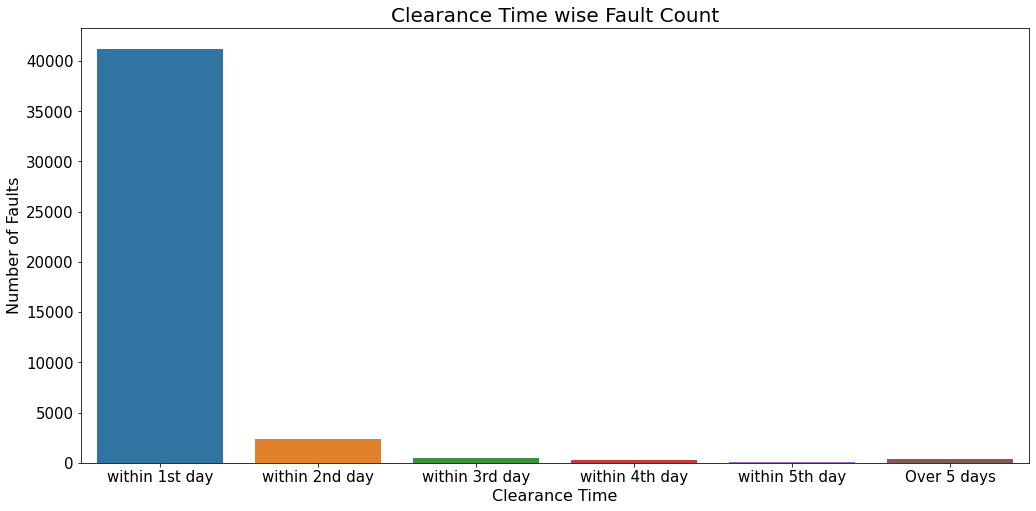

In [183]:
plt.figure(figsize=(17,8))
sns.countplot(df['timeDiff'])
plt.xlabel("Clearance Time", fontsize=16)
plt.ylabel("Number of Faults", fontsize=16)
plt.title("Clearance Time wise Fault Count", fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

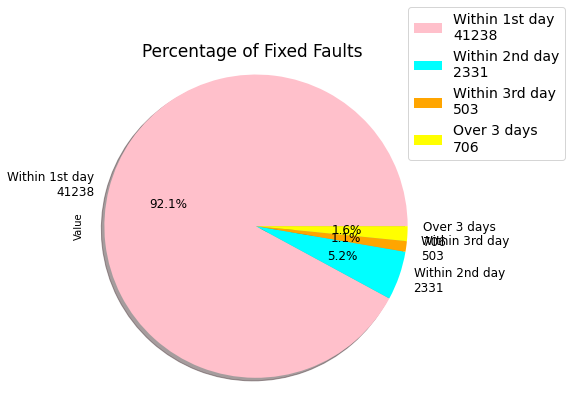

In [184]:
df2 = pd.DataFrame({'Days': ['Within 1st day', 'Within 2nd day', 'Within 3rd day','Over 3 days'],
                   'Value': [41238, 2331, 503,706]})

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['pink','cyan','orange','yellow']
labels = [f"{day}\n{value}" for day, value in zip(df2['Days'], df2['Value'])]
df2.plot.pie(y='Value', labels=labels,colors=colors,
            autopct='%1.1f%%', shadow='FALSE', startangle=0, ax=ax)
plt.title('Percentage of Fixed Faults ',fontsize=17)
plt.axis('equal')

for text in ax.texts:
    text.set_fontsize(12)
    
#plt.legend(fontsize=13)
plt.legend(labels, bbox_to_anchor=(0.85,1.025), loc="upper left", bbox_transform=plt.gcf().transFigure, fontsize=14)
plt.show()

In [185]:
df.accnumber_HASH.value_counts()

ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda76a9b8cbd1984308d6    5347
5e7cabcab02a24667b2f52edf2bcf85e7e4125410b71ba640a5048cac2c11aa9    2394
a90be2b9b369b6265d3d2e5e64d98e54bf8057746630b4f513fae7c12269ed58    1975
0df33b3cb0e4b69f0435fdad484ea14cb609e6d94c97b66b0d69ba59d59a3936    1956
4146e8d15655f1cbe553756bcda533fa861686ed14314088361adce5b44ff2e7     798
                                                                    ... 
197a4b86568d88696e05f8012e24d4283c21c9a8f5d8ff889504ef406c4f0dbd       1
79c0447c7c5f4aa25763fc0717a23b2e2a2239ee40541b95fa3f4d6e8eb66767       1
32aa2b5fd2ec04054d1d4cf9622a03a77b0462128447a7c7d188b8fc94abd8f4       1
b3752a506bd0961a0a8553ae424ea3430d547abe03e9c66d9f005f47fb83cc9a       1
4c0d127f1bd109ae071e4e4ae2149ffdb1846ca199b5e63fe1d332baf2c9b2e3       1
Name: accnumber_HASH, Length: 15321, dtype: int64

In [186]:
df[df.accnumber_HASH=='ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda76a9b8cbd1984308d6']

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,reported_time,ym,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff
533,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0112171920,0006d7434d6ae71382094b682e4dc81f949d2e2915f55c...,KX,HC,V-VOICE COPPER,651-FAULTY DP ARRESTOR,99-OUT OF ORDER,65-OSP-UP TO DP,2022-02-25 16:25:56,2022-02-25 08:23:31,202202,0 days 08:02:25,28945.0,0,2022,2022,02,within 1st day
534,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,TC2227382,285780440e7b024c1474806b7291543f460d75838d1876...,TC,TC,BB-INTERNET COPPER,501-FAULTY SPLITTER,02-NO SVC-INTERNET,50-INTERNAL WIRING,2022-02-18 10:26:47,2022-02-17 16:45:05,202202,0 days 17:41:42,63702.0,0,2022,2022,02,within 1st day
535,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,DI-NODE-DI-DNR-00506-FTTH-0006,a979bdf7793f62eff47fe859f4727deae6574b73be1b46...,AW,AW,AB-FTTH,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-02-25 18:45:03,2022-02-25 16:58:20,202202,0 days 01:46:43,6403.0,0,2022,2022,02,within 1st day
536,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,WU2245270,61cc075f0dc5c127ee906f0476a5f7794047b54f1c95eb...,HB,WU,BB-INTERNET COPPER,981-VERIFIED AFTER VISIT,02-NO SVC-INTERNET,98-NO DEFECT FOUND,2022-02-23 13:37:12,2022-02-23 11:26:26,202202,0 days 02:10:46,7846.0,0,2022,2022,02,within 1st day
537,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,NF-NODE-NF-NF-00061-CAB-0002,4641ec76ded350c4fd48b2d0729881c92f95150c266d59...,GL,GL,AB-CAB,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-02-18 14:00:50,2022-02-18 11:36:39,202202,0 days 02:24:11,8651.0,0,2022,2022,02,within 1st day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45177,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,TG-NODE-TG-TG-00150-CAB-0008,c90fbfa325a71ba7866c3e5bbd60739feac47968d6adda...,HB,TG,AB-CAB,05-FIBER LINK FAILURE,NF-MPLS LINK FAIL,D09-TRANSMISSION NETWORK,2022-05-20 23:56:39,2021-07-26 15:49:07,202205,298 days 08:07:32,25776452.0,298,2021,2022,05,Over 5 days
45190,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0472220901,c90fbfa325a71ba7866c3e5bbd60739feac47968d6adda...,HB,TG,V-VOICE COPPER,05-FIBER LINK FAILURE,NF-MPLS LINK FAIL,D09-TRANSMISSION NETWORK,2022-05-20 23:56:39,2021-07-26 15:49:07,202205,298 days 08:07:32,25776452.0,298,2021,2022,05,Over 5 days
45191,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0472222282,c90fbfa325a71ba7866c3e5bbd60739feac47968d6adda...,HB,TG,V-VOICE COPPER,05-FIBER LINK FAILURE,NF-MPLS LINK FAIL,D09-TRANSMISSION NETWORK,2022-05-20 23:56:39,2021-07-26 15:49:07,202205,298 days 08:07:32,25776452.0,298,2021,2022,05,Over 5 days
45193,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0472241571,c90fbfa325a71ba7866c3e5bbd60739feac47968d6adda...,HB,TG,V-VOICE COPPER,05-FIBER LINK FAILURE,NF-MPLS LINK FAIL,D09-TRANSMISSION NETWORK,2022-05-20 23:56:39,2021-07-26 15:49:07,202205,298 days 08:07:32,25776452.0,298,2021,2022,05,Over 5 days


In [187]:
df['event_source_faultRef_HASH_count'] = pd.DataFrame(df.groupby('event_source')['faultRef_HASH'].transform('count'))
df.head(5)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,reported_time,ym,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,2022-02-17 13:03:34,202202,0 days 03:47:02,13622.0,0,2022,2022,02,within 1st day,2
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,2022-02-11 11:02:32,202202,0 days 04:05:59,14759.0,0,2022,2022,02,within 1st day,2
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,2022-02-20 16:32:37,202202,0 days 16:56:55,61015.0,0,2022,2022,02,within 1st day,3
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,2022-02-13 17:39:20,202202,0 days 16:56:06,60966.0,0,2022,2022,02,within 1st day,3
4,593000f3e6de54bd235dd3400d08196d6870222b8332f5...,94913132423,633bce33f627f1218355b25d5d0a87ae1ccf2f6c254fbb...,GL,UM,BB-INTERNET,701-PORT STUCK,11-LOW SVC QUALITY-INTERNET,70-ACCESS NODE,2022-02-10 09:32:08,2022-02-09 16:41:55,202202,0 days 16:50:13,60613.0,0,2022,2022,02,within 1st day,1


In [188]:
df['accnumber_HASH_fault_count_average'] = df.groupby('accnumber_HASH')['event_source_faultRef_HASH_count'].transform('mean')

In [189]:
df.head(5)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,ym,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,...,202202,0 days 03:47:02,13622.0,0,2022,2022,02,within 1st day,2,2.0
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,...,202202,0 days 04:05:59,14759.0,0,2022,2022,02,within 1st day,2,2.0
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,202202,0 days 16:56:55,61015.0,0,2022,2022,02,within 1st day,3,3.0
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,...,202202,0 days 16:56:06,60966.0,0,2022,2022,02,within 1st day,3,3.0
4,593000f3e6de54bd235dd3400d08196d6870222b8332f5...,94913132423,633bce33f627f1218355b25d5d0a87ae1ccf2f6c254fbb...,GL,UM,BB-INTERNET,701-PORT STUCK,11-LOW SVC QUALITY-INTERNET,70-ACCESS NODE,2022-02-10 09:32:08,...,202202,0 days 16:50:13,60613.0,0,2022,2022,02,within 1st day,1,1.0


In [190]:
df['event_source_faultRef_HASH_count'].value_counts()

1     14381
2      7918
3      4746
4      2836
5      2255
6      1494
14     1484
7       784
8       784
28      728
20      720
9       675
11      539
18      522
22      418
10      360
12      360
16      320
35      280
25      275
21      273
15      240
39      234
13      208
19      190
29      174
32      160
37      148
24      144
17      136
42      126
31      124
36      108
34      102
40       80
26       78
23       69
66       66
59       59
27       54
52       52
41       41
33       33
Name: event_source_faultRef_HASH_count, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


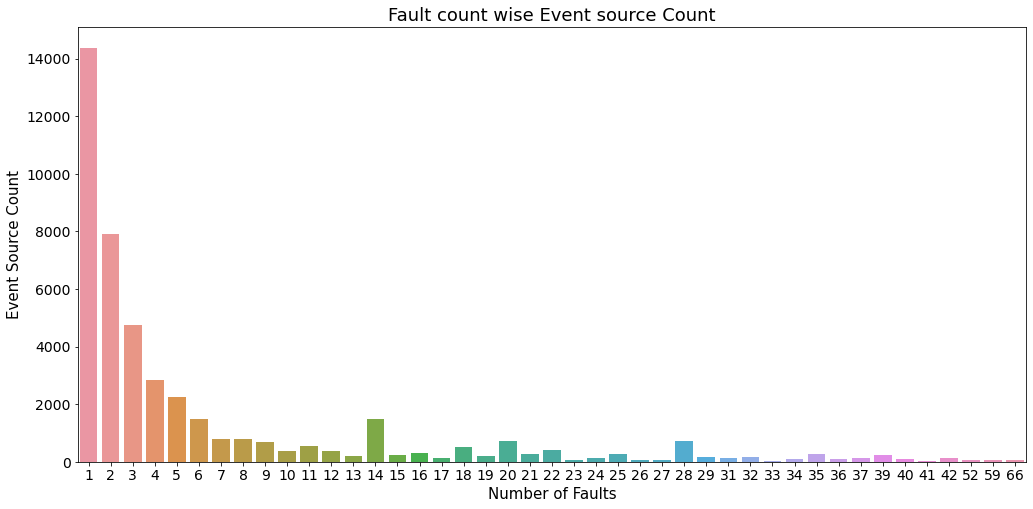

In [191]:
plt.figure(figsize=(17,8))
sns.countplot(df['event_source_faultRef_HASH_count'])
plt.xlabel("Number of Faults", fontsize=15)
plt.ylabel("Event Source Count", fontsize=15)
plt.title("Fault count wise Event source Count", fontsize=18)
plt.tick_params(labelsize=14)
plt.show()

array([[<AxesSubplot:title={'center':'cleared_time'}>,
        <AxesSubplot:title={'center':'reported_time'}>,
        <AxesSubplot:title={'center':'ym'}>],
       [<AxesSubplot:title={'center':'clearance_time_seconds'}>,
        <AxesSubplot:title={'center':'clearance_time_days'}>,
        <AxesSubplot:title={'center':'reported_year'}>],
       [<AxesSubplot:title={'center':'Cleared_year'}>,
        <AxesSubplot:title={'center':'event_source_faultRef_HASH_count'}>,
        <AxesSubplot:title={'center':'accnumber_HASH_fault_count_average'}>]],
      dtype=object)

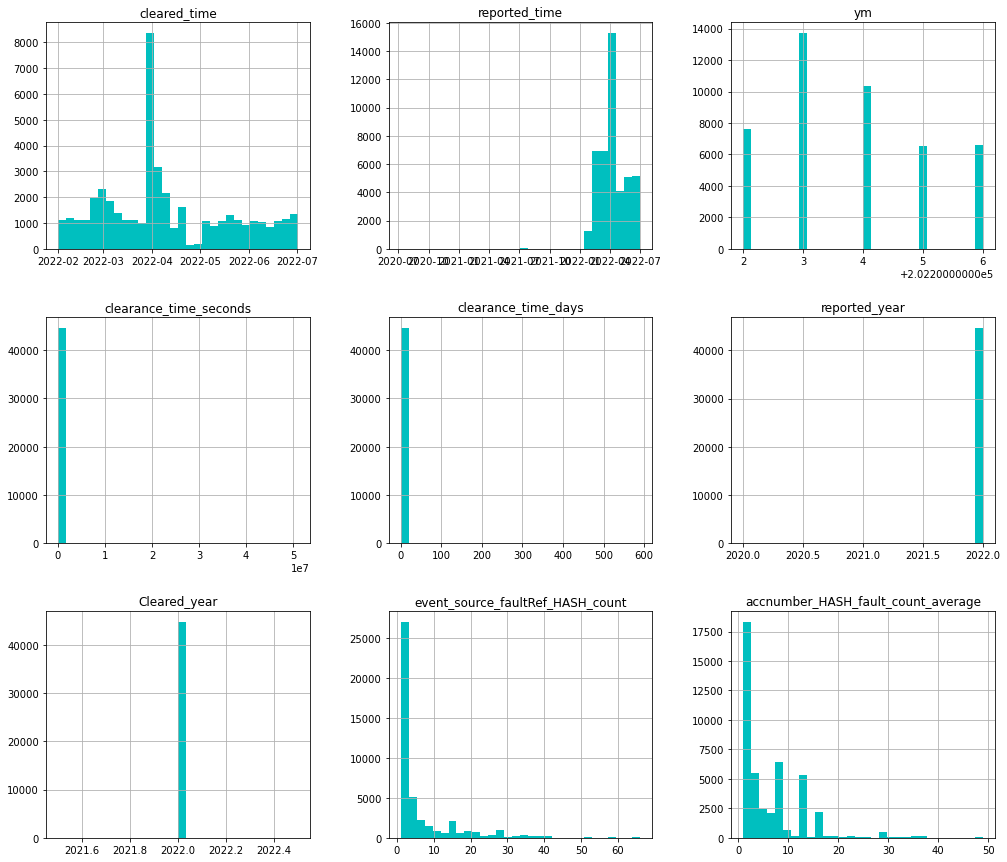

In [192]:
#Histogram

df.hist(figsize=(17,15), bins=30, color='c')

In [193]:
df.reported_year.value_counts()

2022    44695
2021       81
2020        2
Name: reported_year, dtype: int64

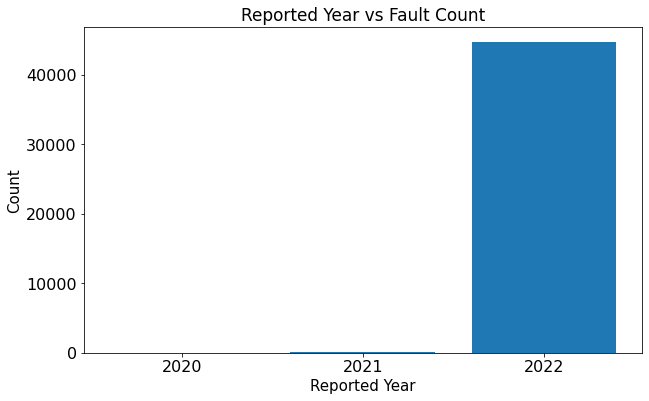

In [194]:
import matplotlib.pyplot as plt

# Get the values and labels for the bar chart
values = df.reported_year.value_counts().values
labels = df.reported_year.value_counts().index

# Create the figure and set the size
plt.figure(figsize=(10,6))

# Plot the bar chart
plt.bar(labels, values)

# Set the x-axis label and y-axis label
plt.xlabel('Reported Year', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.xticks([2020, 2021, 2022])

# Set the tick label font size
plt.tick_params(labelsize=16)


# Set the title and font size
plt.title('Reported Year vs Fault Count', fontsize=17)

plt.show()


In [195]:
df.Cleared_year.value_counts()

2022    44778
Name: Cleared_year, dtype: int64

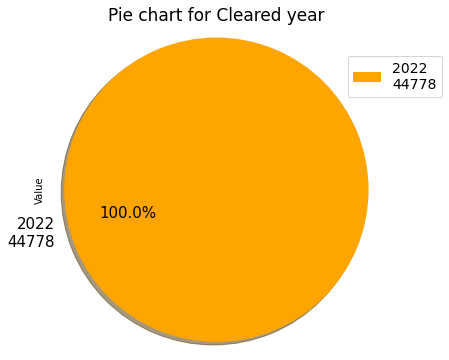

In [196]:
df3 = pd.DataFrame({'category': ['2022'],
                   'Value': [44778]})

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['orange']
labels = [f"{day}\n{value}" for day, value in zip(df3['category'], df3['Value'])]
df3.plot.pie(y='Value',labels=labels,colors=colors,
            autopct='%1.1f%%', shadow='FALSE', startangle=15, ax=ax)
plt.title('Pie chart for Cleared year',fontsize=17)
plt.axis('equal')

for text in ax.texts:
    text.set_fontsize(15)

# Add the legend to the plot
plt.legend(labels, bbox_to_anchor=(0.8,0.7), loc=3, bbox_transform=plt.gcf().transFigure, fontsize=14)
plt.show()

In [197]:
from tabulate import tabulate

# Set the field names
headers = ["Reported Year", "Faults Count"]

# Set the data for each row
data = [[key, value] for key, value in df.reported_year.value_counts().items()]

# Print the table
print(tabulate(data, headers))

  Reported Year    Faults Count
---------------  --------------
           2022           44695
           2021              81
           2020               2


Text(0.5, 1.0, 'Reported_time vs Fault Count')

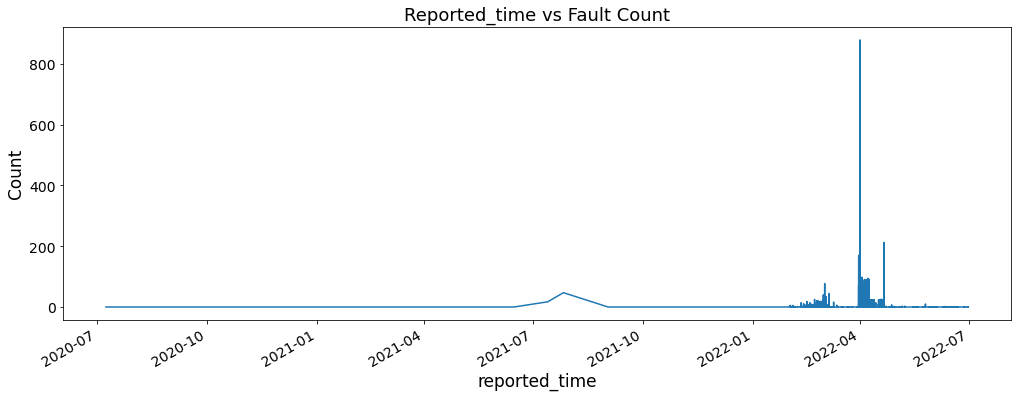

In [198]:
plt.figure(figsize=(17,6))
x=df['reported_time'].value_counts().sort_index().plot.line()
plt.xlabel('reported_time',fontsize=17)
plt.ylabel('Count',fontsize=17)
plt.tick_params(labelsize=14)
plt.title('Reported_time vs Fault Count',fontsize=18)

In [199]:
df[df['reported_time']>'2022-01-01'].shape

(44695, 21)

In [200]:
df4=df

In [201]:
df4 = df4[df4['reported_time']>'2022-01-01']

Text(0.5, 1.0, 'reported_time vs Fault Count')

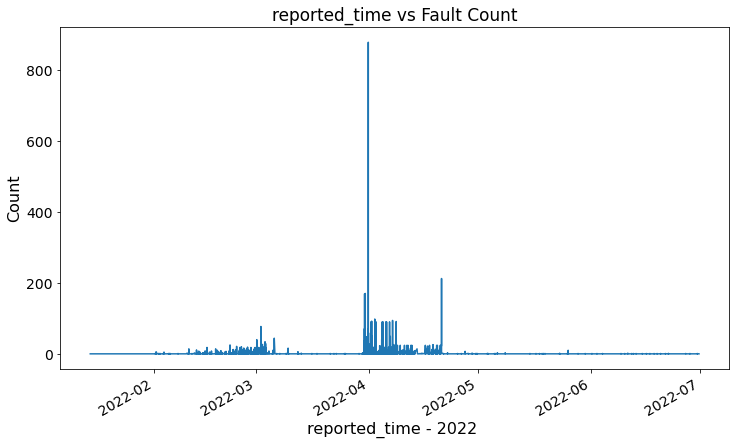

In [202]:
plt.figure(figsize=(12,7))
x=df4['reported_time'].value_counts().sort_index().plot.line()
plt.xlabel('reported_time - 2022 ',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tick_params(labelsize=14)
plt.title('reported_time vs Fault Count',fontsize=17)

In [203]:
df5 = df[df['reported_time']>='2022-04-01']

In [204]:
df5 = df5[df5['reported_time']<'2022-05-01']

In [205]:
df5.shape

(9603, 21)

Text(0.5, 1.0, 'reported_time(April) vs Fault Count')

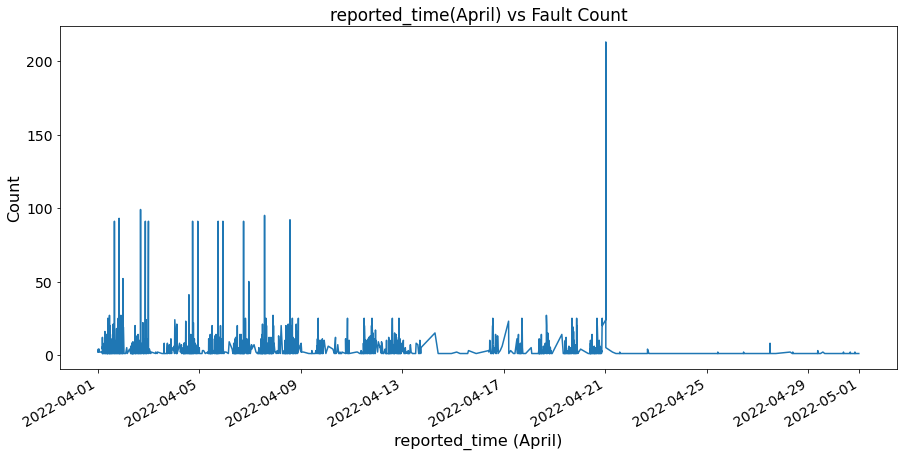

In [206]:
plt.figure(figsize=(15,7))
x=df5['reported_time'].value_counts().sort_index().plot.line()
plt.xlabel('reported_time (April)',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tick_params(labelsize=14)
plt.title('reported_time(April) vs Fault Count',fontsize=17)

In [207]:
df6 = df[df['reported_time']>='2022-03-01']

In [208]:
df6 = df6[df6['reported_time']<='2022-03-31']

In [209]:
df6.shape

(10589, 21)

Text(0.5, 1.0, 'reported_time(March) vs Fault Count')

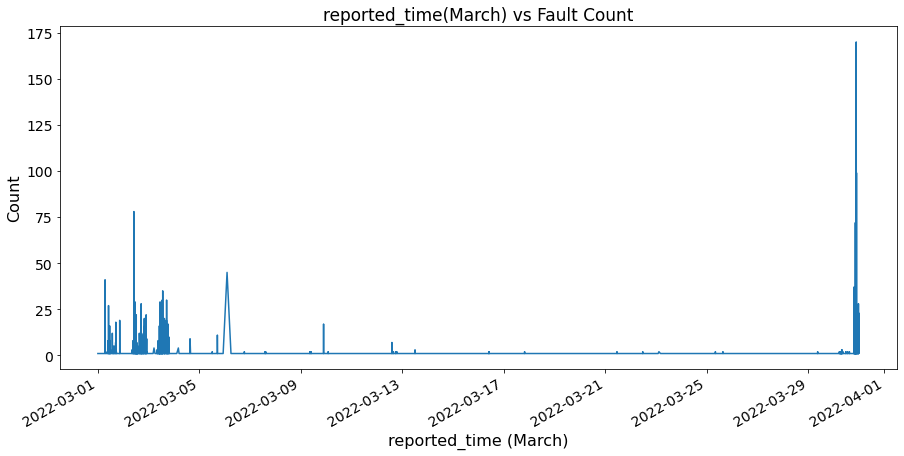

In [210]:
plt.figure(figsize=(15,7))
x=df6['reported_time'].value_counts().sort_index().plot.line()
plt.xlabel('reported_time (March)',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tick_params(labelsize=14)
plt.title('reported_time(March) vs Fault Count',fontsize=17)

In [211]:
df7 = df[df['reported_time']>='2022-02-01']

In [212]:
df7 = df4[df4['reported_time']<='2022-02-28']

In [213]:
df7.shape

(7236, 21)

Text(0.5, 1.0, 'reported_time(February) vs Fault Count')

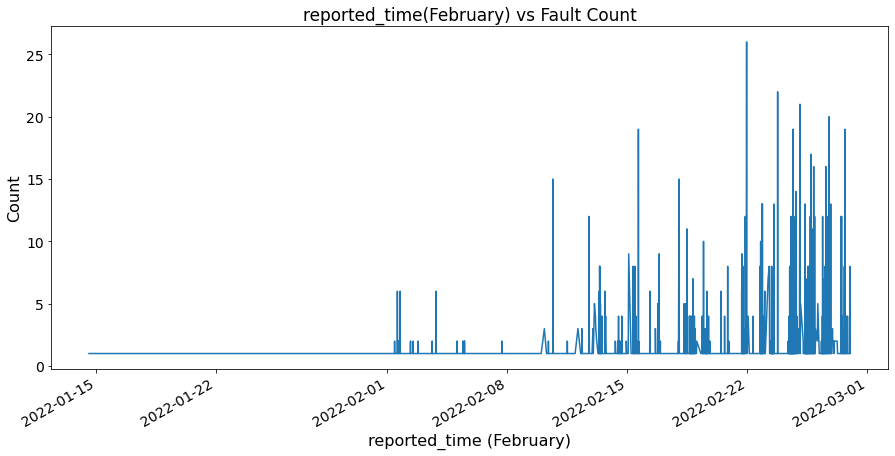

In [214]:
plt.figure(figsize=(15,7))
x=df7['reported_time'].value_counts().sort_index().plot.line()
plt.xlabel('reported_time (February)',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tick_params(labelsize=14)
plt.title('reported_time(February) vs Fault Count',fontsize=17)

In [215]:
df8 = df[df['reported_time'] >='2021-01-01']

In [216]:
df8 = df8[df8['reported_time'] <='2021-12-31']

In [217]:
df8.shape

(81, 21)

Text(0.5, 1.0, 'reported_time(2021) vs Fault Count')

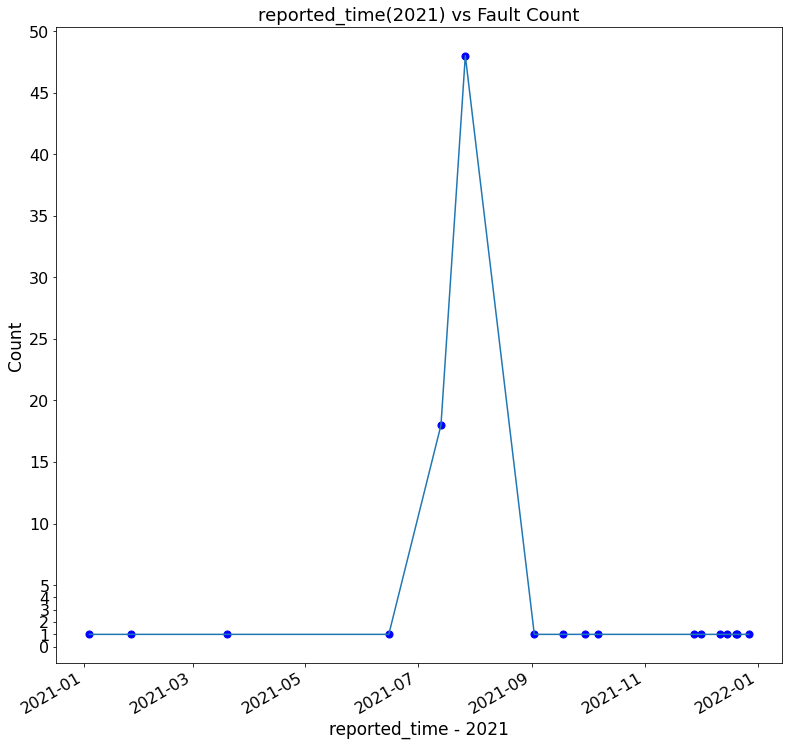

In [218]:
import matplotlib.pyplot as plt

# Create the figure and set the size
plt.figure(figsize=(13,13))

# Plot the line plot
x = df8['reported_time'].value_counts().sort_index().plot.line()

# Get the Axes object
ax = plt.gca()

# Get the data points as a NumPy array
data = df8['reported_time'].value_counts().sort_index().values

# Get the x-axis values as a NumPy array
x_vals = df8['reported_time'].value_counts().sort_index().index.values

# Plot the data points as a scatter plot on top of the line plot
ax.scatter(x_vals, data, s=50, c='blue')

# Set the x-axis label and y-axis label
plt.xlabel('reported_time - 2021', fontsize=17)
plt.ylabel('Count', fontsize=17)

#ax.set_yticks([0,1,2,3,4, 5,6,7,8,9, 10,11,12,13,14, 15,16,17,18,19, 20,21,22,23,24, 25,26,27,28,29, 30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45 ,46,47,48,49, 50])
ax.set_yticks([0,1,2,3,4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

# Set the tick label font size
plt.tick_params(labelsize=16)

# Set the title and font size
plt.title('reported_time(2021) vs Fault Count', fontsize=18)

In [219]:
df[df.reported_year==2021].shape
df[df.reported_year==2021].head(50)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,ym,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average
2424,4c81c3032c19c6fdae5abdff61393df3b77a80a5adf9cb...,94473141355,bb713e12e01cd83caac9cd75d9ddaef29af853896e6fc0...,MH,UB,BB-INTERNET,NaN,99-OUT OF ORDER,99-OTHER,2022-03-13 12:35:34,...,202203,165 days 01:10:38,14260238.0,165,2021,2022,03,Over 5 days,1,1.000000
2428,8a5ef6d64b74808c742f82a19470ae22c788aa901b7711...,94813159215,96a3971b6337eef1f3e1fccc94f26dfdc028e6fb165f0b...,KY,KS,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,17-VAS RELATED ISSUE,10-USER DEVICES/APPLICATIONS,2022-03-20 10:18:00,...,202203,98 days 20:29:15,8540955.0,98,2021,2022,03,Over 5 days,1,1.000000
2436,c35eee81c4fbf29459eafd0cac5df9d85544e18d29f86f...,94663123040,b3c113a57a10443537ab8717319822bd4c30049692d2a6...,DB,DB,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-03-20 10:20:20,...,202203,89 days 22:34:08,7770848.0,89,2021,2022,03,Over 5 days,1,1.000000
2466,823038a5dae746ad54bbc26862188d69fc2fd9290d7a82...,94413135333,4a4cc78e2ef9ed71f9b114fc5cd2946892440762d47890...,MH,HM,BB-INTERNET,NaN,11-LOW SVC QUALITY-INTERNET,98-NO DEFECT FOUND,2022-03-21 13:05:02,...,202203,109 days 22:47:19,9499639.0,109,2021,2022,03,Over 5 days,1,1.000000
2476,139585fdd2efee001068856fc8a4819d11697e067cd25e...,94373151815,b0a5b0195ce784cdd9682a5d9ce7e571e3042a9483a9d8...,KLY,PL,BB-INTERNET,982-VERIFIED OVER THE PHONE,02-NO SVC-INTERNET,98-NO DEFECT FOUND,2022-03-21 09:55:22,...,202203,90 days 17:31:08,7839068.0,90,2021,2022,03,Over 5 days,1,1.000000
9258,1c001323a00ec53b5902c4b27f018e54414ceb35e36425...,94113451029,852538551f1b0c0fac4dcbaa17064155554ed3776bbefc...,HO,HO,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-02 12:12:54,...,202202,66 days 17:45:04,5766304.0,66,2021,2022,02,Over 5 days,3,3.000000
9263,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,0412273270,7821266d10979714681948701f9103d283edbf0eadf438...,MH,DN,V-VOICE COPPER,951-OTHER (REFER COMMENT),01-NO SVC-VOICE,95-MANAGED SERVICES,2022-02-19 11:51:31,...,202202,66 days 03:16:15,5714175.0,66,2021,2022,02,Over 5 days,8,8.855620
9281,6251670b71088166d6926a166aa08c82b444ca626fff98...,94333143975,8086f793c871b0ca7c1126dd50f82a45544c40acc3bb25...,MD,CEN,BB-INTERNET,15-RWT RIGHT WHEN CHECKED,02-NO SVC-INTERNET,D01-CUSTOMER,2022-02-18 14:03:08,...,202202,169 days 13:10:20,14649020.0,169,2021,2022,02,Over 5 days,1,1.000000
9304,c3b7e84aff18da39c3cf772573333d69f0e439ddda5527...,94113696226,806f8078bf1cdff715a307aa455fedec7b6e621225a006...,HO,HO,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-01 11:48:39,...,202202,393 days 11:35:40,33996940.0,393,2021,2022,02,Over 5 days,4,4.000000
33407,ca00322519aa15fcc8ecf8e4ede6774335489a19a895b0...,94112635163,dbc1bf1f6fb94da46da157ee2d0e1da53aff6f4f9ed9d2...,RM,RM,BB-INTERNET FTTH,999-OTHER (REFER COMMENT),02-NO SVC-INTERNET,99-OTHER,2022-06-30 12:21:01,...,202206,267 days 03:04:24,23079864.0,267,2021,2022,06,Over 5 days,2,1.666667


Text(0.5, 1.0, 'cleared_time vs Fault Count')

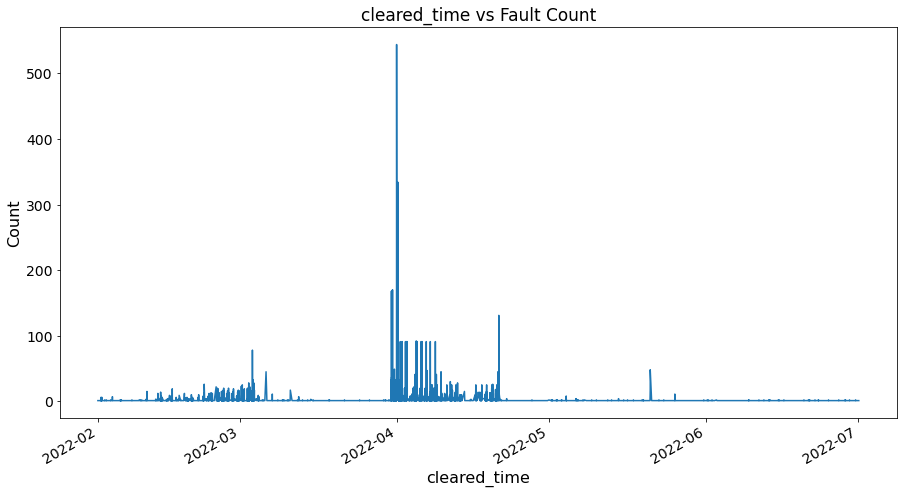

In [220]:
plt.figure(figsize=(15,8))
x=df['cleared_time'].value_counts().sort_index().plot.line()
plt.xlabel('cleared_time',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.tick_params(labelsize=14)
plt.title('cleared_time vs Fault Count',fontsize=17)

In [221]:
# Number of faults reported in each month
df.Cleared_time_month.value_counts()

03    13705
04    10341
02     7648
06     6574
05     6510
Name: Cleared_time_month, dtype: int64

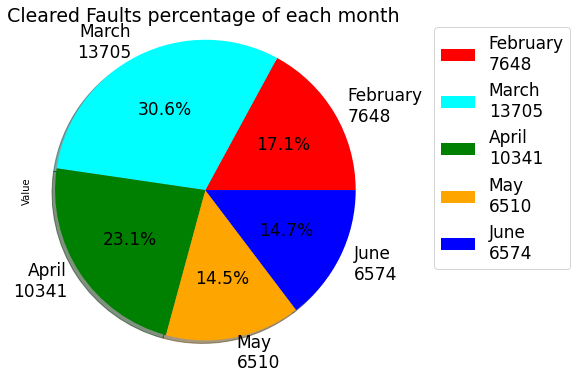

In [222]:
df9 = pd.DataFrame({'month': [ 'February','March', 'April', 'May', 'June'],
                   'Value': [7648,13705,10341,6510,6574]})

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['red','cyan','green','orange', 'blue']
labels = [f"{day}\n{value}" for day, value in zip(df9['month'], df9['Value'])]
df9.plot.pie(y='Value', labels=labels,colors=colors,
            autopct='%1.1f%%', shadow='FALSE', startangle=0, ax=ax)
plt.title('Cleared Faults percentage of each month',fontsize=19)
plt.axis('equal')

for text in ax.texts:
    text.set_fontsize(17)

# Add the legend to the plot
plt.legend(labels, bbox_to_anchor=(1.027,0.9), bbox_transform=plt.gcf().transFigure, fontsize=17)
plt.show()

In [223]:
df.category.value_counts()

80-NETWORK                         22401
30-CPE                              4686
98-NO DEFECT FOUND                  4390
99-OTHER                            3730
10-USER DEVICES/APPLICATIONS        2371
70-ACCESS NODE                      1281
95-MANAGED SERVICES                  848
40-CPE ACCESSORIES                   809
60-OSP-BEYOND DP                     777
90-USER ACCOUNT                      600
D14-ONLINE SUPPORT                   509
50-INTERNAL WIRING                   470
65-OSP-UP TO DP                      392
D01-CUSTOMER                         385
D02-CPE (SLT)                        314
D09-TRANSMISSION NETWORK             255
D06-WIRELESS ACCESS                  195
D17-MPLS - VPN                       102
20-MANAGED DEVICES/APPLICATIONS      100
D10-ISP NETWORK                       50
NF-BB 01-BBNW                         21
D07-DATA ACCESS NETWORK               15
D15-SERVICE SUSPENDED                 14
35-SLTGO WI-FI                        13
D05-SLT OSP     

In [224]:
data = np.array([['80-NETWORK', 22401], ['30-CPE',4686],['98-NO DEFECT FOUND',4390],['99-OTHER',3730],['10-USER DEVICES/APPLICATIONS',2371],['70-ACCESS NODE',1281],['95-MANAGED SERVICES',848],['40-CPE ACCESSORIES',809],['60-OSP-BEYOND DP',777],['90-USER ACCOUNT',600],['D14-ONLINE SUPPORT',509],['50-INTERNAL WIRING',470],['65-OSP-UP TO DP',392],['D01-CUSTOMER', 385],['D02-CPE (SLT)',314],['D09-TRANSMISSION NETWORK',255],['D06-WIRELESS ACCESS',195],['D17-MPLS - VPN',102],['20-MANAGED DEVICES/APPLICATIONS',100],['D10-ISP NETWORK',50],['NF-BB 01-BBNW',21],['D07-DATA ACCESS NETWORK',15],['D15-SERVICE SUSPENDED',14],['35-SLTGO WI-FI',13]])
df10 = pd.DataFrame(data, columns=['Category', 'Count'])

df10['Count'] = df10['Count'].astype(int)
df10.head()

,Category,Count
0,80-NETWORK,22401
1,30-CPE,4686
2,98-NO DEFECT FOUND,4390
3,99-OTHER,3730
4,10-USER DEVICES/APPLICATIONS,2371


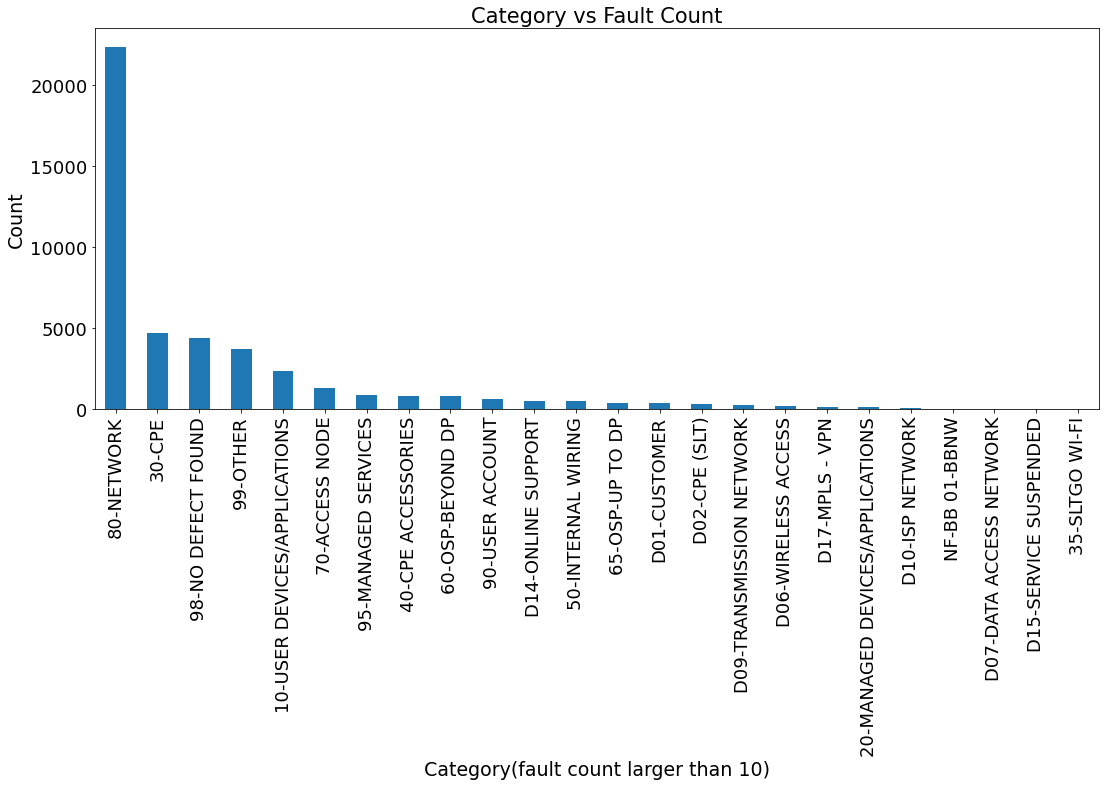

In [225]:
import matplotlib.pyplot as plt

# Create the figure and set the size
fig, ax = plt.subplots(figsize=(18, 7))

# Plot the bar chart
df10.plot.bar(x='Category', y='Count', rot=90, legend=None, ax=ax)

# Set the x-axis label and y-axis label
ax.set_xlabel('Category(fault count larger than 10)',fontsize=19)
ax.set_ylabel('Count',fontsize=19)

plt.title('Category vs Fault Count', fontsize=21)
plt.tick_params(labelsize=18)
# Show the plot
plt.show()

In [226]:
df.sub_category.value_counts()

NF-MPLS NODE FAIL                16850
02-NO SVC-INTERNET               16096
99-OUT OF ORDER                   5942
01-NO SVC-VOICE                   2042
11-LOW SVC QUALITY-INTERNET       1705
05-CPE NOT WORKING                 819
03-NO SVC-IPTV                     291
07-CPE ACCESSORY NOT WORKING       180
10-LOW SVC QUALITY-VOICE           152
09-BATTERY PACK NOT WORKING        151
NF-MPLS LINK FAIL                  149
NF-NETWORK FAULT                    91
08-PWR ADAPTER NOT WORKING          76
D-DATA SVC NOT WORKING              57
17-VAS RELATED ISSUE                56
12-LOW SVC QUALITY-IPTV             21
06-STB NOT WORKING                  14
15-ONLINE CONFIG SUPPORT REQS       14
04-NO SVC-TSTV                      14
14-APP/WEBSITE NOT WORKING          11
16-FIELD VISIT REQS - PAY OK        10
NF-TX TX LINK FAIL                   8
FTTH OUT OF ORDER                    4
28-SLTGO WI-FI NOT WORKING           4
26-V-APP_PORTAL ISSUES               3
D-DIOD ISSUE             

In [227]:
data = np.array([['NF-MPLS NODE FAIL', 16850], ['02-NO SVC-INTERNET',16096],['99-OUT OF ORDER',5942],['01-NO SVC-VOICE',2042],['11-LOW SVC QUALITY-INTERNET',1705],['05-CPE NOT WORKING',819],['03-NO SVC-IPTV',291],['07-CPE ACCESSORY NOT WORKING',180],['10-LOW SVC QUALITY-VOICE',152],['09-BATTERY PACK NOT WORKING',151],['NF-MPLS LINK FAIL',149],['NF-NETWORK FAULT',91],['08-PWR ADAPTER NOT WORKING',76],['D-DATA SVC NOT WORKING', 57],['17-VAS RELATED ISSUE',56],['12-LOW SVC QUALITY-IPTV',21],['06-STB NOT WORKING',14],['15-ONLINE CONFIG SUPPORT REQS',14],['04-NO SVC-TSTV',14],['14-APP/WEBSITE NOT WORKING',11],['16-FIELD VISIT REQS - PAY OK',10]])
df11 = pd.DataFrame(data, columns=['Sub_Category', 'Count'])

df11['Count'] = df11['Count'].astype(int)
df11.head()

,Sub_Category,Count
0,NF-MPLS NODE FAIL,16850
1,02-NO SVC-INTERNET,16096
2,99-OUT OF ORDER,5942
3,01-NO SVC-VOICE,2042
4,11-LOW SVC QUALITY-INTERNET,1705


In [228]:
df11.dtypes

Sub_Category    object
Count            int32
dtype: object

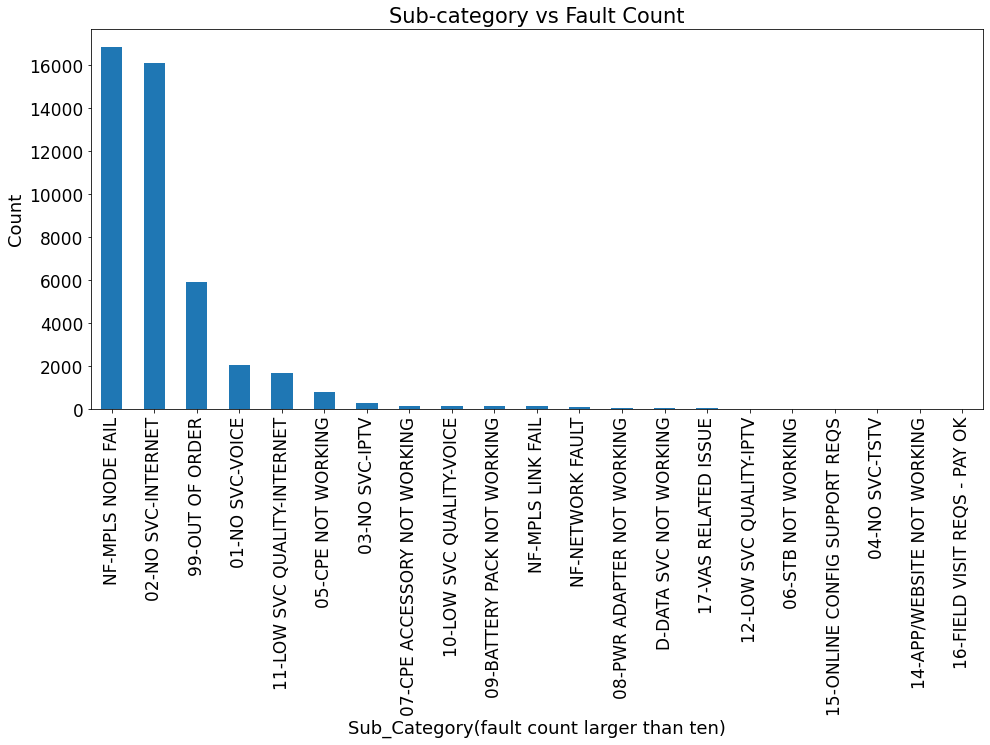

In [229]:
import matplotlib.pyplot as plt

# Create the figure and set the size
fig, ax = plt.subplots(figsize=(16, 7))

# Plot the bar chart
df11.plot.bar(x='Sub_Category', y='Count', rot=90, legend=None, ax=ax)

# Set the x-axis label and y-axis label
ax.set_xlabel('Sub_Category(fault count larger than ten)',fontsize=18)
ax.set_ylabel('Count',fontsize=18)

plt.title('Sub-category vs Fault Count', fontsize=21)
plt.tick_params(labelsize=17)
# Show the plot
plt.show()

In [230]:
df.head()

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,ym,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,...,202202,0 days 03:47:02,13622.0,0,2022,2022,02,within 1st day,2,2.0
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,...,202202,0 days 04:05:59,14759.0,0,2022,2022,02,within 1st day,2,2.0
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,202202,0 days 16:56:55,61015.0,0,2022,2022,02,within 1st day,3,3.0
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,...,202202,0 days 16:56:06,60966.0,0,2022,2022,02,within 1st day,3,3.0
4,593000f3e6de54bd235dd3400d08196d6870222b8332f5...,94913132423,633bce33f627f1218355b25d5d0a87ae1ccf2f6c254fbb...,GL,UM,BB-INTERNET,701-PORT STUCK,11-LOW SVC QUALITY-INTERNET,70-ACCESS NODE,2022-02-10 09:32:08,...,202202,0 days 16:50:13,60613.0,0,2022,2022,02,within 1st day,1,1.0


In [231]:
df.category.unique()

array(['10-USER DEVICES/APPLICATIONS', '80-NETWORK', '70-ACCESS NODE',
       '99-OTHER', '98-NO DEFECT FOUND', '30-CPE', 'D06-WIRELESS ACCESS',
       'D01-CUSTOMER', '90-USER ACCOUNT', '40-CPE ACCESSORIES',
       '95-MANAGED SERVICES', 'D14-ONLINE SUPPORT', 'D02-CPE (SLT)',
       '60-OSP-BEYOND DP', 'D09-TRANSMISSION NETWORK',
       '50-INTERNAL WIRING', '20-MANAGED DEVICES/APPLICATIONS',
       '65-OSP-UP TO DP', 'D17-MPLS - VPN', 'D15-SERVICE SUSPENDED',
       '35-SLTGO WI-FI', 'NF-BB 01-BBNW', 'SIP03-SERVICE SUSPENDED',
       'D10-ISP NETWORK', 'D04-DCE', 'D03-CPE (PRIVATE)',
       'SIP01-CUSTOMER', 'QM06-ENHANCED FACILITY', 'D16-SOFT SWITCH',
       'D11-INTERNATIONAL NETWORK', 'D07-DATA ACCESS NETWORK',
       'D05-SLT OSP', nan, 'QM04-ONLINE SUPPORT', '351664',
       'MS01-CUSTOMER', 'QM05-SERVICE SUSPENDED', 'SIP02-ONLINE'],
      dtype=object)

In [232]:
# Group the data by the 'category' column
grouped_data = df.groupby('category')

# Find the unique values in the 'sub_category' column for each group
unique_sub_categories = grouped_data['sub_category'].unique()

# Print the unique values for each group
for category, sub_categories in unique_sub_categories.items():
    print(f"Category: {category}")
    print(f"Unique sub categories: {sub_categories}")
    print()


Category: 10-USER DEVICES/APPLICATIONS
Unique sub categories: ['02-NO SVC-INTERNET' '11-LOW SVC QUALITY-INTERNET' '17-VAS RELATED ISSUE'
 '01-NO SVC-VOICE' '99-OUT OF ORDER' '09-BATTERY PACK NOT WORKING'
 '05-CPE NOT WORKING' '08-PWR ADAPTER NOT WORKING' '03-NO SVC-IPTV'
 '10-LOW SVC QUALITY-VOICE' '07-CPE ACCESSORY NOT WORKING'
 '15-ONLINE CONFIG SUPPORT REQS' '04-NO SVC-TSTV' '06-STB NOT WORKING'
 '14-APP/WEBSITE NOT WORKING']

Category: 20-MANAGED DEVICES/APPLICATIONS
Unique sub categories: ['02-NO SVC-INTERNET' '99-OUT OF ORDER' '01-NO SVC-VOICE'
 '11-LOW SVC QUALITY-INTERNET' '10-LOW SVC QUALITY-VOICE'
 '09-BATTERY PACK NOT WORKING' '03-NO SVC-IPTV'
 '08-PWR ADAPTER NOT WORKING']

Category: 30-CPE
Unique sub categories: ['02-NO SVC-INTERNET' '99-OUT OF ORDER' '11-LOW SVC QUALITY-INTERNET'
 '05-CPE NOT WORKING' '07-CPE ACCESSORY NOT WORKING' '01-NO SVC-VOICE'
 '08-PWR ADAPTER NOT WORKING' '12-LOW SVC QUALITY-IPTV'
 '10-LOW SVC QUALITY-VOICE' '03-NO SVC-IPTV' '09-BATTERY PACK NOT WO

In [233]:
df12 = df[df['category']=='80-NETWORK']
df12.shape

(22401, 21)

In [234]:
df12.sub_category.value_counts()

NF-MPLS NODE FAIL                16729
02-NO SVC-INTERNET                3819
99-OUT OF ORDER                    980
11-LOW SVC QUALITY-INTERNET        398
01-NO SVC-VOICE                    259
05-CPE NOT WORKING                  83
03-NO SVC-IPTV                      34
10-LOW SVC QUALITY-VOICE            30
07-CPE ACCESSORY NOT WORKING        22
09-BATTERY PACK NOT WORKING         18
NF-TX TX LINK FAIL                   8
08-PWR ADAPTER NOT WORKING           5
04-NO SVC-TSTV                       3
12-LOW SVC QUALITY-IPTV              3
16-FIELD VISIT REQS - PAY OK         2
15-ONLINE CONFIG SUPPORT REQS        2
M_QM  ACCESS ISSUE                   1
06-STB NOT WORKING                   1
17-VAS RELATED ISSUE                 1
FTTH OUT OF ORDER                    1
14-APP/WEBSITE NOT WORKING           1
NF-TX NODE FAIL: LIGHTNING           1
Name: sub_category, dtype: int64

In [235]:
df12.head()

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,ym,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,202202,0 days 16:56:55,61015.0,0,2022,2022,02,within 1st day,3,3.000000
15,082dc4aa69ca3cc043001787b533bed40217ba08c25359...,IPTV0112171481,05edda2010ce90e7b65262dfe860fc189c4dc2d129a331...,KX,KX,E-IPTV COPPER,801-NODE ISOLATED,NF-MPLS NODE FAIL,80-NETWORK,2022-02-26 10:56:31,...,202202,0 days 00:58:09,3489.0,0,2022,2022,02,within 1st day,4,4.066667
16,5ad457f67252814eceb36f63d30d8bba61acc55b41dd5c...,94813141397,03b809c80a9d560938eac54387337daba7df1c10ff9555...,RN,RN,BB-INTERNET,NaN,02-NO SVC-INTERNET,80-NETWORK,2022-02-08 09:32:22,...,202202,0 days 23:25:16,84316.0,0,2022,2022,02,within 1st day,1,1.000000
18,92aca9b015296063cdf4d9777dc953b3a722b52324f48f...,94113466396,cc65a7981892edebfc5af9fd27e8c8bb18aceb345cfb32...,RG,JL,BB-INTERNET,804-INTERNET SERVICE ISSUE,02-NO SVC-INTERNET,80-NETWORK,2022-02-18 20:48:35,...,202202,0 days 02:17:43,8263.0,0,2022,2022,02,within 1st day,2,2.000000
21,c6336c2fcdfc7fcdfcd04a3ee371070af8ec93b352004a...,94473129751,c7661b3797eaf4b21a608b39a42dc7583c86741297cca4...,HB,ANK,BB-INTERNET,801-NODE ISOLATED,02-NO SVC-INTERNET,80-NETWORK,2022-02-27 10:07:21,...,202202,0 days 23:14:00,83640.0,0,2022,2022,02,within 1st day,5,5.000000


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


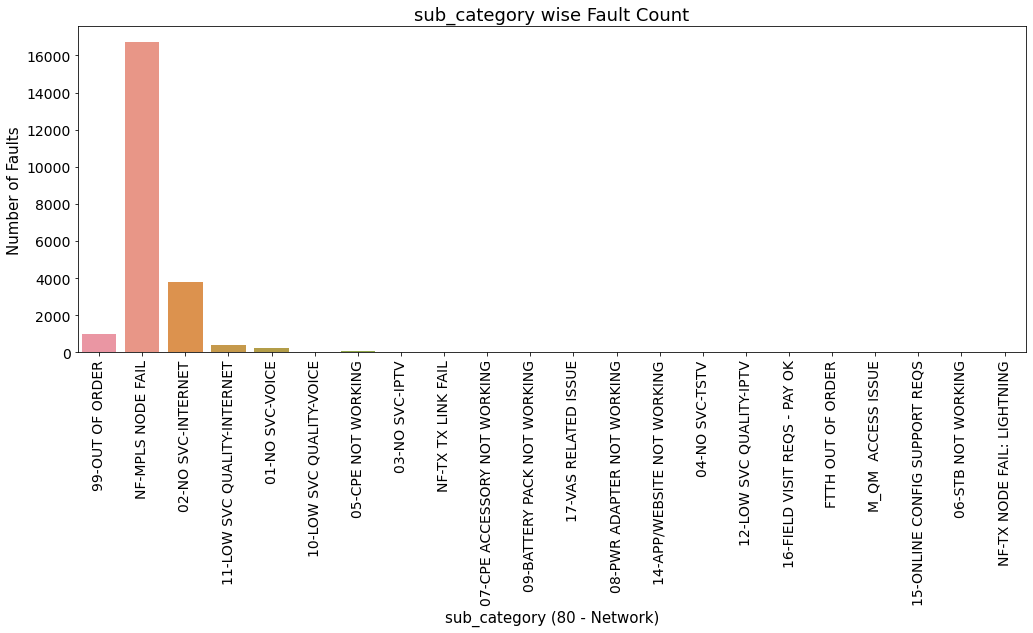

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
sns.countplot(df12['sub_category'])
plt.xlabel("sub_category (80 - Network)", fontsize=15)
plt.ylabel("Number of Faults", fontsize=15)
plt.title("sub_category wise Fault Count", fontsize=18)
plt.tick_params(labelsize=14)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()

In [237]:
df['clearance_time_max'] = pd.DataFrame(df.groupby('accnumber_HASH')['clearance_time'].transform('max'))
df.head(5)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,clearance_time,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,...,0 days 03:47:02,13622.0,0,2022,2022,02,within 1st day,2,2.0,0 days 04:05:59
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,...,0 days 04:05:59,14759.0,0,2022,2022,02,within 1st day,2,2.0,0 days 04:05:59
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,0 days 16:56:55,61015.0,0,2022,2022,02,within 1st day,3,3.0,0 days 23:35:41
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,...,0 days 16:56:06,60966.0,0,2022,2022,02,within 1st day,3,3.0,0 days 16:56:06
4,593000f3e6de54bd235dd3400d08196d6870222b8332f5...,94913132423,633bce33f627f1218355b25d5d0a87ae1ccf2f6c254fbb...,GL,UM,BB-INTERNET,701-PORT STUCK,11-LOW SVC QUALITY-INTERNET,70-ACCESS NODE,2022-02-10 09:32:08,...,0 days 16:50:13,60613.0,0,2022,2022,02,within 1st day,1,1.0,0 days 16:50:13


In [238]:
df.dtypes

accnumber_HASH                                 object
event_source                                   object
faultRef_HASH                                  object
opmc_name                                      object
lea_code                                       object
cirt_sert_abbreviation                         object
fault_in                                       object
sub_category                                   object
category                                       object
cleared_time                           datetime64[ns]
reported_time                          datetime64[ns]
ym                                              int64
clearance_time                        timedelta64[ns]
clearance_time_seconds                        float64
clearance_time_days                             int64
reported_year                                   int64
Cleared_year                                    int64
Cleared_time_month                             object
timeDiff                    

In [239]:
df['clearance_time_sum'] = pd.DataFrame(df.groupby('accnumber_HASH')['clearance_time'].transform('sum'))
df.head(5)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,clearance_time_seconds,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max,clearance_time_sum
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,...,13622.0,0,2022,2022,02,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,...,14759.0,0,2022,2022,02,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,61015.0,0,2022,2022,02,within 1st day,3,3.0,0 days 23:35:41,1 days 18:35:19
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,...,60966.0,0,2022,2022,02,within 1st day,3,3.0,0 days 16:56:06,1 days 04:35:28
4,593000f3e6de54bd235dd3400d08196d6870222b8332f5...,94913132423,633bce33f627f1218355b25d5d0a87ae1ccf2f6c254fbb...,GL,UM,BB-INTERNET,701-PORT STUCK,11-LOW SVC QUALITY-INTERNET,70-ACCESS NODE,2022-02-10 09:32:08,...,60613.0,0,2022,2022,02,within 1st day,1,1.0,0 days 16:50:13,0 days 16:50:13


In [240]:
df['event_source_clearance_time_seconds_sum'] = pd.DataFrame(df.groupby('event_source')['clearance_time_seconds'].transform('sum'))
df.head(5)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,clearance_time_days,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max,clearance_time_sum,event_source_clearance_time_seconds_sum
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,...,0,2022,2022,02,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01,28381.0
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,...,0,2022,2022,02,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01,28381.0
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,0,2022,2022,02,within 1st day,3,3.0,0 days 23:35:41,1 days 18:35:19,153319.0
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,...,0,2022,2022,02,within 1st day,3,3.0,0 days 16:56:06,1 days 04:35:28,102928.0
4,593000f3e6de54bd235dd3400d08196d6870222b8332f5...,94913132423,633bce33f627f1218355b25d5d0a87ae1ccf2f6c254fbb...,GL,UM,BB-INTERNET,701-PORT STUCK,11-LOW SVC QUALITY-INTERNET,70-ACCESS NODE,2022-02-10 09:32:08,...,0,2022,2022,02,within 1st day,1,1.0,0 days 16:50:13,0 days 16:50:13,60613.0


In [241]:
df['clearance_time_avg'] = df.groupby('accnumber_HASH')['event_source_clearance_time_seconds_sum'].transform('mean')
df.head(3)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max,clearance_time_sum,event_source_clearance_time_seconds_sum,clearance_time_avg
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,...,2022,2022,02,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01,28381.0,28381.0
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,...,2022,2022,02,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01,28381.0,28381.0
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,2022,2022,02,within 1st day,3,3.0,0 days 23:35:41,1 days 18:35:19,153319.0,153319.0


In [242]:
df[df.accnumber_HASH == '8156cd012cb0053552ac495f0bc0b7997f09a1ed494b375959224baf3d123c0a']

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,reported_year,Cleared_year,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max,clearance_time_sum,event_source_clearance_time_seconds_sum,clearance_time_avg
9288,8156cd012cb0053552ac495f0bc0b7997f09a1ed494b37...,94333146988,a72b03426d7a7c7831b0b84ddf4120ba7e65dadc001338...,MD,CEN,BB-INTERNET,15-RWT RIGHT WHEN CHECKED,26-V-APP_PORTAL ISSUES,D01-CUSTOMER,2022-02-18 14:05:48,...,2020,2022,02,Over 5 days,3,3.0,590 days 00:44:36,595 days 03:10:00,51419400.0,51419400.0
27417,8156cd012cb0053552ac495f0bc0b7997f09a1ed494b37...,94333146988,78d893be4d4b41bc57f060d8748580a2be02001e5d139c...,RM,RM,BB-INTERNET,802-POOR SIGNAL STRENGTH,02-NO SVC-INTERNET,80-NETWORK,2022-06-11 11:06:32,...,2022,2022,06,within 1st day,3,3.0,590 days 00:44:36,595 days 03:10:00,51419400.0,51419400.0
33307,8156cd012cb0053552ac495f0bc0b7997f09a1ed494b37...,94333146988,64f5f7f36ef406e26d9ede01d1ea8e6f936c6855b92e9e...,GQ,GE,BB-INTERNET,D01-08-OTHER (COMMENT ATTACHED),02-NO SVC-INTERNET,D01-CUSTOMER,2022-06-21 06:34:49,...,2022,2022,06,within 5th day,3,3.0,590 days 00:44:36,595 days 03:10:00,51419400.0,51419400.0


In [243]:
df13 = df

In [244]:
df13['clearance_time_max_seconds'] = df13['clearance_time_max'].dt.total_seconds()

In [245]:
df13['clearance_time_sum_seconds'] = df13['clearance_time_sum'].dt.total_seconds()

In [246]:
df13.head()

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,Cleared_time_month,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max,clearance_time_sum,event_source_clearance_time_seconds_sum,clearance_time_avg,clearance_time_max_seconds,clearance_time_sum_seconds
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,...,02,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01,28381.0,28381.0,14759.0,28381.0
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,...,02,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01,28381.0,28381.0,14759.0,28381.0
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,02,within 1st day,3,3.0,0 days 23:35:41,1 days 18:35:19,153319.0,153319.0,84941.0,153319.0
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,...,02,within 1st day,3,3.0,0 days 16:56:06,1 days 04:35:28,102928.0,102928.0,60966.0,102928.0
4,593000f3e6de54bd235dd3400d08196d6870222b8332f5...,94913132423,633bce33f627f1218355b25d5d0a87ae1ccf2f6c254fbb...,GL,UM,BB-INTERNET,701-PORT STUCK,11-LOW SVC QUALITY-INTERNET,70-ACCESS NODE,2022-02-10 09:32:08,...,02,within 1st day,1,1.0,0 days 16:50:13,0 days 16:50:13,60613.0,60613.0,60613.0,60613.0


In [247]:
df13 = df13.drop(["opmc_name", "lea_code","event_source","cirt_sert_abbreviation","cleared_time","Cleared_time_month","reported_time","fault_in","clearance_time","reported_year","clearance_time_days","ym","clearance_time_sum","clearance_time_max"], axis=1)

In [248]:
conditions = [
    (df['clearance_time'] >='0 days' ) & (df['clearance_time'] <='30 days' ),
    (df['clearance_time'] > '30 days') & (df['clearance_time'] <= '60 days'),
    (df['clearance_time'] > '60 days') & (df['clearance_time'] <= '90 days'),
    (df['clearance_time'] > '90 days') & (df['clearance_time'] <= '120 days'),
    (df['clearance_time'] > '120 days') & (df['clearance_time'] <= '150 days'),
    (df['clearance_time'] > '150 days') & (df['clearance_time'] <= '180 days'),
    (df['clearance_time'] > '180 days') & (df['clearance_time'] <= '210 days'),
    (df['clearance_time'] >='0 days' ) & (df['clearance_time'] <='240 days' ),
    (df['clearance_time'] > '30 days') & (df['clearance_time'] <= '270 days'),
    (df['clearance_time'] > '60 days') & (df['clearance_time'] <= '300 days'),
    (df['clearance_time'] > '90 days') & (df['clearance_time'] <= '330 days'),
    (df['clearance_time'] > '120 days') & (df['clearance_time'] <= '360 days'),
    (df['clearance_time'] > '150 days') & (df['clearance_time'] <= '390 days'),
    (df['clearance_time'] > '180 days') & (df['clearance_time'] <= '420 days'),
    (df['clearance_time'] > '90 days') & (df['clearance_time'] <= '450 days'),
    (df['clearance_time'] > '120 days') & (df['clearance_time'] <= '480 days'),
    (df['clearance_time'] > '150 days') & (df['clearance_time'] <= '510 days'),
    (df['clearance_time'] > '180 days') & (df['clearance_time'] <= '540 days'),
    (df['clearance_time'] > '150 days') & (df['clearance_time'] <= '570 days'),
    (df['clearance_time'] > '180 days') & (df['clearance_time'] <= '600 days'),
    
]

choices = ['within 1st month',
           'within 2nd month',
           'within 3rd month',
           'within 4th month',
           'within 5th month',
           'within 6th month',
           'within 7th month',
           'within 8th month',
           'within 9th month',
           'within 10th month',
           'within 11th month',
           'within 12th month',
           'within 13th month',
           'within 14th month',
           'within 15th month',
           'within 16th month',
           'within 17th month',
           'within 18th month',
           'within 19th month',
           'within 20th month'
]

df['timeDiff_range'] = np.select(conditions, choices, 'over 20 month')
df.tail(4)

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max,clearance_time_sum,event_source_clearance_time_seconds_sum,clearance_time_avg,clearance_time_max_seconds,clearance_time_sum_seconds,timeDiff_range
45212,0149e52b35a6b05151efd43907606f0720affcbbaff162...,94113416224,61c56879d03992489ac9ad9b08ff6dec905a470e3f7ac2...,NG,KN,BB-INTERNET,802-POOR SIGNAL STRENGTH,02-NO SVC-INTERNET,80-NETWORK,2022-05-05 09:55:01,...,within 5th day,2,2.0,4 days 13:29:46,6 days 01:29:59,523799.0,523799.0,394186.0,523799.0,within 1st month
45213,bf7ab514b30cd6ec9f4c2c21cd16523084f8cc9d25cd7e...,94323122849,b62d9a8ebfc1c6f4bba699548797d1fa133bfa03f18d6e...,CW,RD,BB-INTERNET,982-VERIFIED OVER THE PHONE,02-NO SVC-INTERNET,98-NO DEFECT FOUND,2022-05-01 09:43:49,...,within 1st day,2,2.0,0 days 18:17:35,1 days 07:15:54,112554.0,112554.0,65855.0,112554.0,within 1st month
45214,6fd837e7de1504c946bd39bcc3e86bf155e5bc75b58b8e...,94113457391,1c8626441a6e1e1d917e00e57c0008f5dff88dd91b1f5e...,BIA,SIY,BB-INTERNET,802-POOR SIGNAL STRENGTH,02-NO SVC-INTERNET,80-NETWORK,2022-05-02 10:15:10,...,within 2nd day,1,1.0,1 days 13:01:39,1 days 13:01:39,133299.0,133299.0,133299.0,133299.0,within 1st month
45215,4c0d127f1bd109ae071e4e4ae2149ffdb1846ca199b5e6...,0113435067,38945f38d7e65d4d598ff0700677161759f05d201b3ab9...,NTB,VG,V-VOICE,982-VERIFIED OVER THE PHONE,99-OUT OF ORDER,98-NO DEFECT FOUND,2022-05-01 13:55:00,...,within 1st day,1,1.0,0 days 16:38:12,0 days 16:38:12,59892.0,59892.0,59892.0,59892.0,within 1st month


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


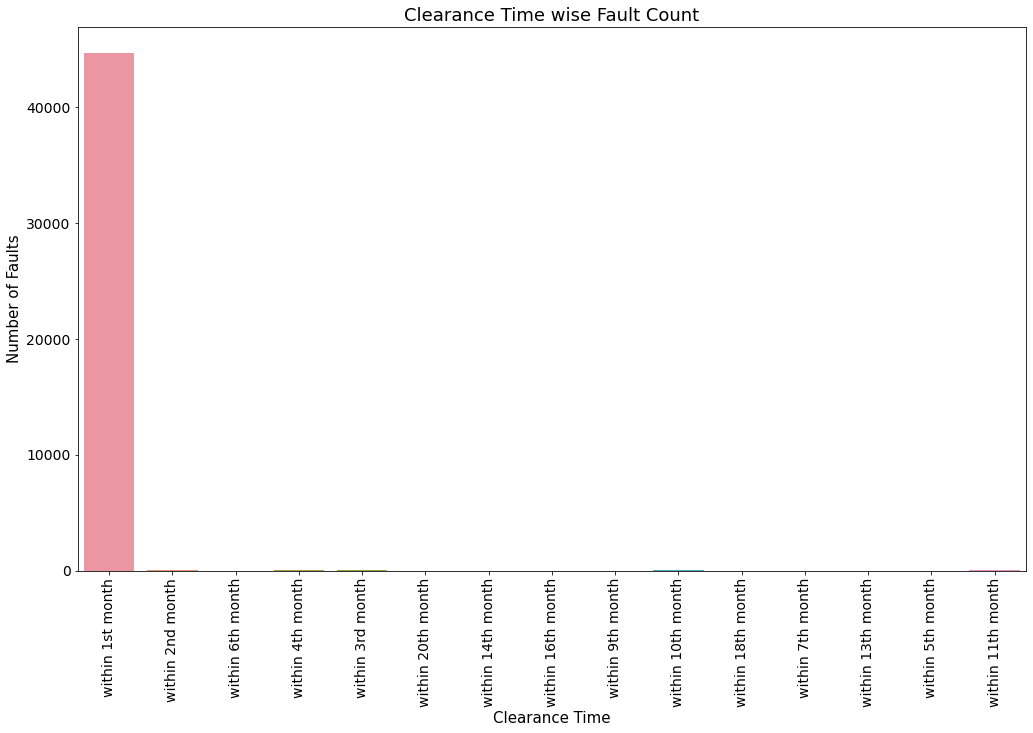

In [249]:
plt.figure(figsize=(17,10))
sns.countplot(df['timeDiff_range'])
plt.xlabel("Clearance Time", fontsize=15)
plt.ylabel("Number of Faults", fontsize=15)
plt.title("Clearance Time wise Fault Count", fontsize=18)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
#ax.set_yticks([0,100,200,300,400,500,600,700,800,900,10000,20000,30000,40000, 50000])
plt.show()

In [250]:
df_large_within_1st_month = df[df.timeDiff_range!='within 1st month']

In [251]:
df_large_within_1st_month.shape

(97, 28)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


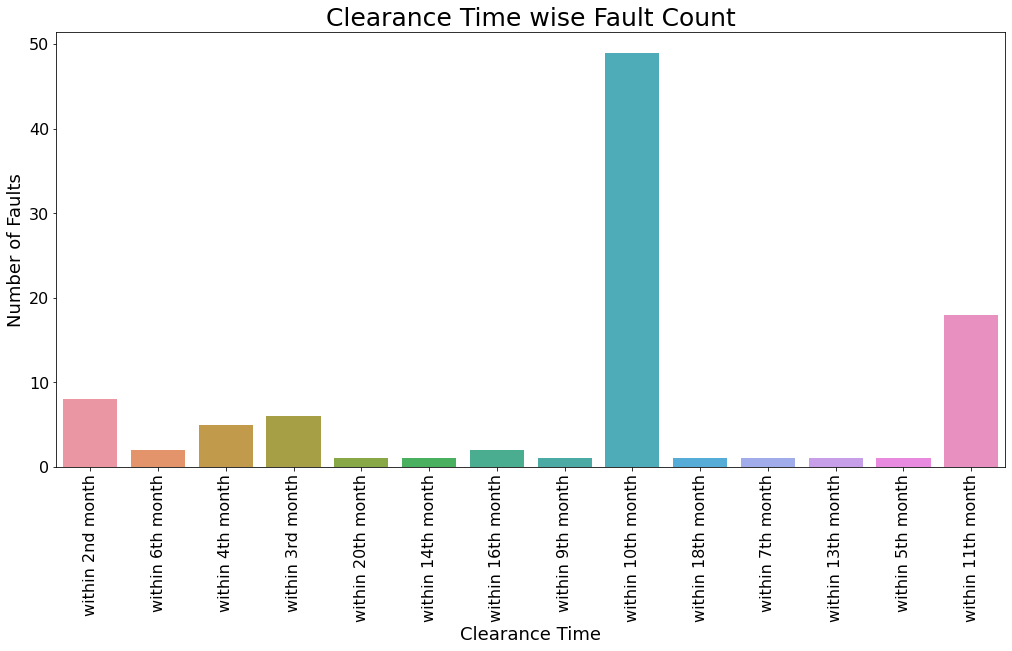

In [252]:
plt.figure(figsize=(17,8))
sns.countplot(df_large_within_1st_month['timeDiff_range'])
plt.xlabel("Clearance Time", fontsize=18)
plt.ylabel("Number of Faults", fontsize=18)
plt.title("Clearance Time wise Fault Count", fontsize=25)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
#ax.set_yticks([0,100,200,300,400,500,600,700,800,900,10000,20000,30000,40000, 50000])
plt.show()

In [253]:
from tabulate import tabulate
from colorama import Fore, Style

# Set the field names
headers = ["Clearance Time", "Total Number of Faults"]

# Set the data for each row
data = [[Fore.BLACK + key + Style.RESET_ALL, Fore.BLACK + str(value) + Style.RESET_ALL] for key, value in df.timeDiff_range.value_counts().items()]

# Print the table
print(tabulate(data, headers))

Clearance Time       Total Number of Faults
-----------------  ------------------------
within 1st month                      44681
within 10th month                        49
within 11th month                        18
within 2nd month                          8
within 3rd month                          6
within 4th month                          5
within 6th month                          2
within 16th month                         2
within 20th month                         1
within 14th month                         1
within 9th month                          1
within 18th month                         1
within 7th month                          1
within 13th month                         1
within 5th month                          1


In [254]:
df14 = df

In [255]:
df14=df14[df14.timeDiff_range=='within 10th month']

In [256]:
df14.shape

(49, 28)

In [257]:
df14.head()

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max,clearance_time_sum,event_source_clearance_time_seconds_sum,clearance_time_avg,clearance_time_max_seconds,clearance_time_sum_seconds,timeDiff_range
33415,4386f1878753ee18a5e7edbb223f53fa729d51c9a47bd1...,94813140464,938447c864abb78fdc3ad1d4cad8106a9e845dd929ee4d...,KY,WH,BB-INTERNET,999-OTHER (REFER COMMENT),02-NO SVC-INTERNET,99-OTHER,2022-06-30 12:21:01,...,Over 5 days,1,1.000000,286 days 02:34:36,286 days 02:34:36,24719676.0,2.471968e+07,24719676.0,24719676.0,within 10th month
45042,0df33b3cb0e4b69f0435fdad484ea14cb609e6d94c97b6...,0472241071,c90fbfa325a71ba7866c3e5bbd60739feac47968d6adda...,HB,TG,V-VOICE COPPER,05-FIBER LINK FAILURE,NF-MPLS LINK FAIL,D09-TRANSMISSION NETWORK,2022-05-20 23:56:39,...,Over 5 days,1,16.048057,298 days 08:07:32,2062 days 01:30:27,25776452.0,2.083918e+05,25776452.0,178162227.0,within 10th month
45043,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,TG-NODE-TG-TG-00150-CAB-0006,c90fbfa325a71ba7866c3e5bbd60739feac47968d6adda...,HB,TG,AB-CAB,05-FIBER LINK FAILURE,NF-MPLS LINK FAIL,D09-TRANSMISSION NETWORK,2022-05-20 23:56:39,...,Over 5 days,1,8.855620,298 days 08:07:32,10835 days 12:24:35,25776452.0,4.325093e+05,25776452.0,936188675.0,within 10th month
45044,ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda...,TG-VTD-NODE-TG-VTD-00010-CAB-0007,c90fbfa325a71ba7866c3e5bbd60739feac47968d6adda...,HB,TG,AB-CAB,05-FIBER LINK FAILURE,NF-MPLS LINK FAIL,D09-TRANSMISSION NETWORK,2022-05-20 23:56:39,...,Over 5 days,5,8.855620,298 days 08:07:32,10835 days 12:24:35,25824988.0,4.325093e+05,25776452.0,936188675.0,within 10th month
45045,f50fc0c0dca1b7ecba281d88c287f14424f3b1c7237766...,TG2241039,c90fbfa325a71ba7866c3e5bbd60739feac47968d6adda...,HB,TG,BB-INTERNET COPPER,05-FIBER LINK FAILURE,NF-MPLS LINK FAIL,D09-TRANSMISSION NETWORK,2022-05-20 23:56:39,...,Over 5 days,1,1.444444,298 days 08:07:32,2386 days 20:33:02,25776452.0,3.150739e+07,25776452.0,206224382.0,within 10th month


In [258]:
df14.event_source_faultRef_HASH_count.unique()

array([1, 5, 2, 9], dtype=int64)

In [259]:
df14.accnumber_HASH.value_counts()

ec3bbf18adbae15dbbd22145ac394ffa370a236fdb0bda76a9b8cbd1984308d6    32
f50fc0c0dca1b7ecba281d88c287f14424f3b1c72377664b84caa7ec62c259aa     8
0df33b3cb0e4b69f0435fdad484ea14cb609e6d94c97b66b0d69ba59d59a3936     6
86b94df1050396aa297ed8e29c938e24dcc771d216222e41f5eb29320729eb0c     2
4386f1878753ee18a5e7edbb223f53fa729d51c9a47bd1d446e8a9db289a4113     1
Name: accnumber_HASH, dtype: int64

In [260]:
df14.category.value_counts()

D09-TRANSMISSION NETWORK    48
99-OTHER                     1
Name: category, dtype: int64

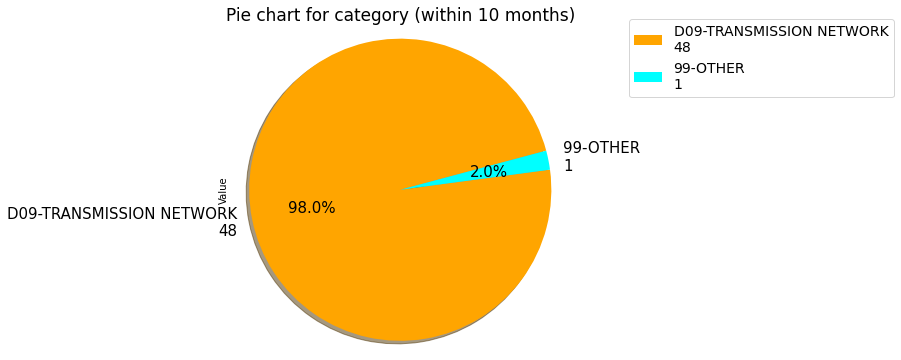

In [261]:
df15 = pd.DataFrame({'category': ['D09-TRANSMISSION NETWORK', '99-OTHER'],
                   'Value': [48,1]})

fig, ax = plt.subplots(figsize=(6, 6))
colors = ['orange','cyan']
labels = [f"{day}\n{value}" for day, value in zip(df15['category'], df15['Value'])]
df15.plot.pie(y='Value',labels=labels,colors=colors,
            autopct='%1.1f%%', shadow='FALSE', startangle=15, ax=ax)
plt.title('Pie chart for category (within 10 months)',fontsize=17)
plt.axis('equal')

for text in ax.texts:
    text.set_fontsize(15)

# Add the legend to the plot
plt.legend(labels, bbox_to_anchor=(1.025,0.7), loc=3, bbox_transform=plt.gcf().transFigure, fontsize=14)
plt.show()

In [262]:
df.dtypes

accnumber_HASH                                      object
event_source                                        object
faultRef_HASH                                       object
opmc_name                                           object
lea_code                                            object
cirt_sert_abbreviation                              object
fault_in                                            object
sub_category                                        object
category                                            object
cleared_time                                datetime64[ns]
reported_time                               datetime64[ns]
ym                                                   int64
clearance_time                             timedelta64[ns]
clearance_time_seconds                             float64
clearance_time_days                                  int64
reported_year                                        int64
Cleared_year                                         int

array([[<AxesSubplot:title={'center':'clearance_time_max_seconds'}>]],
      dtype=object)

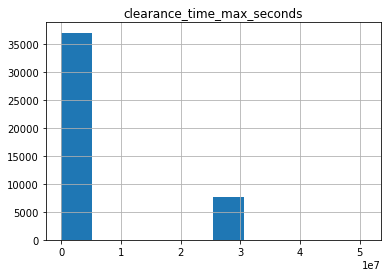

In [263]:
df.hist(column='clearance_time_max_seconds')

In [264]:
df16 = df[['accnumber_HASH','Cleared_time_month','clearance_time_max_seconds','clearance_time_sum_seconds']]

In [265]:
df16 = df16.drop_duplicates(subset='accnumber_HASH')

In [266]:
df16.shape

(15321, 4)

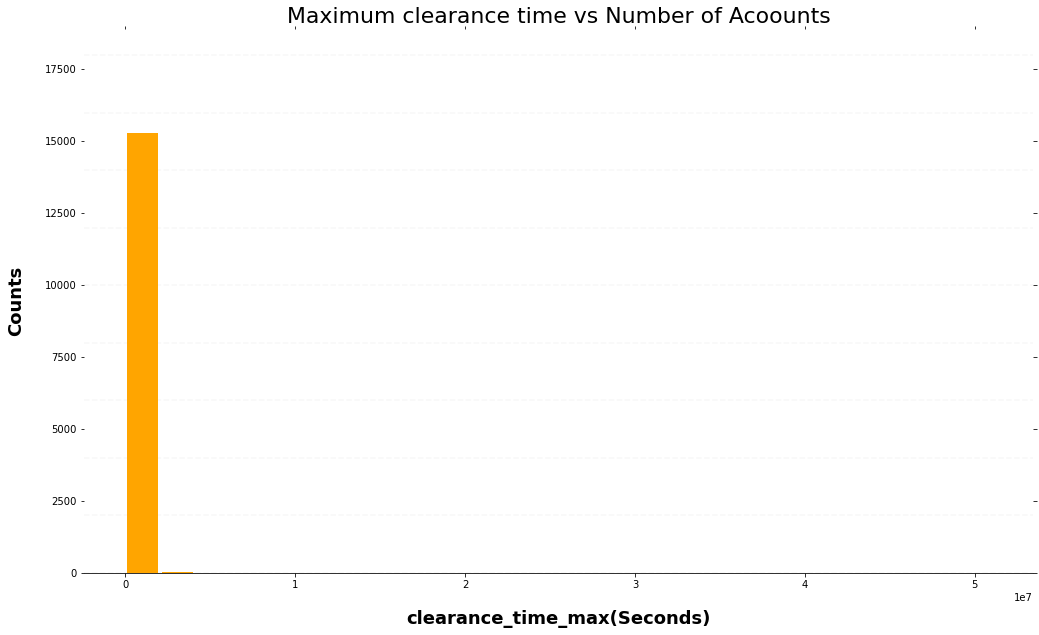

In [267]:
ax = df16.hist(column='clearance_time_max_seconds', bins=25, grid=False, figsize=(17,10), color='orange', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Maximum clearance time vs Number of Acoounts",fontsize=22)

    # Set x-axis label
    x.set_xlabel("clearance_time_max(Seconds)", labelpad=20, weight='bold', size=12,fontsize=18)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12,fontsize=18)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

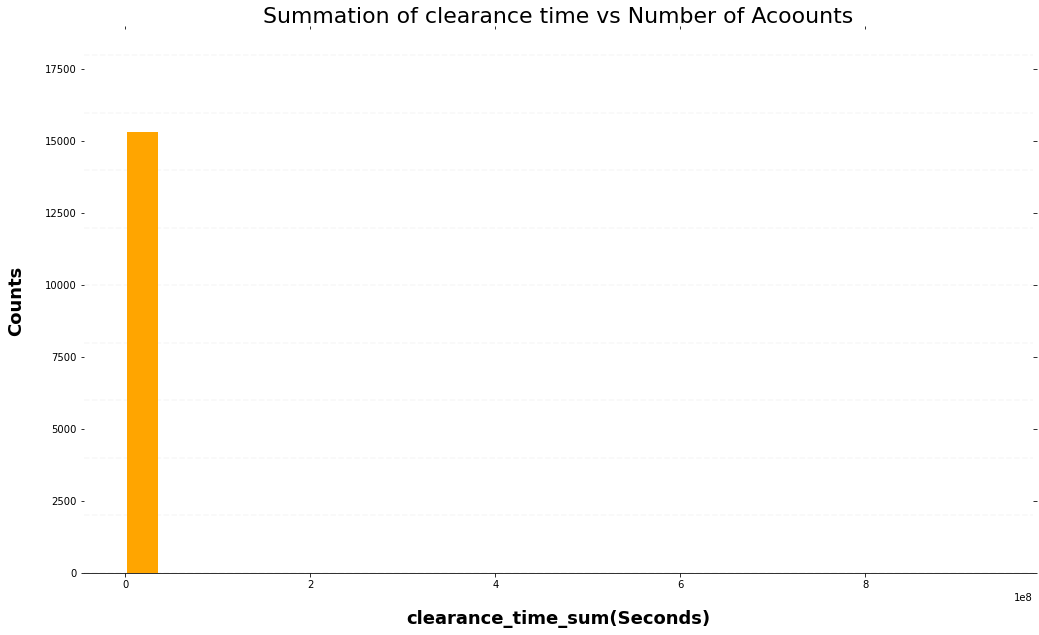

In [268]:
ax = df16.hist(column='clearance_time_sum_seconds', bins=25, grid=False, figsize=(17,10), color='orange', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Summation of clearance time vs Number of Acoounts",fontsize=22)

    # Set x-axis label
    x.set_xlabel("clearance_time_sum(Seconds)", labelpad=20, weight='bold', size=12,fontsize=18)

    # Set y-axis label
    x.set_ylabel("Counts", labelpad=20, weight='bold', size=12,fontsize=18)
    


    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

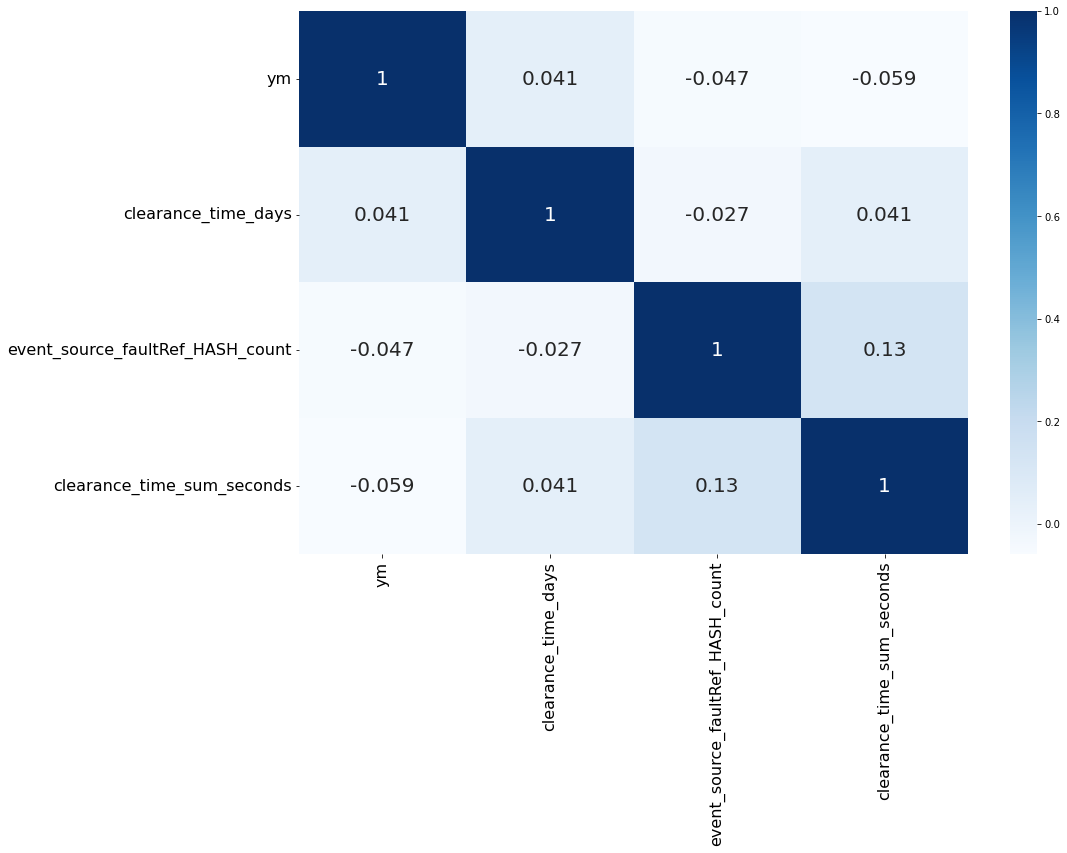

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to include in the heatmap
columns = ['ym', 'clearance_time_days','event_source_faultRef_HASH_count','clearance_time_sum_seconds']

# Create a subdataframe with only the selected columns
df_sub = df[columns]

# Create the heatmap
plt.figure(figsize=(15,10)) # Set the size of the figure
plt.tick_params(labelsize=16) # Set the font size of the tick labels
sns.heatmap(df_sub.corr(), annot=True, cmap='Blues', annot_kws={"fontsize": 20}) # Create the heatmap with annotation and a blue color map

# Show the plot
plt.show()

In [270]:
df.clearance_time_sum_seconds.min()

12.0

In [271]:
df.clearance_time_sum_seconds.max()

936188675.0

In [272]:
df17 = df

In [273]:
df17 = df17[df17.timeDiff_range!='within 1st month']

In [274]:
df17.shape

(97, 28)

In [275]:
df17.category.value_counts()

D09-TRANSMISSION NETWORK           66
99-OTHER                           14
10-USER DEVICES/APPLICATIONS        5
98-NO DEFECT FOUND                  4
D01-CUSTOMER                        3
20-MANAGED DEVICES/APPLICATIONS     2
D15-SERVICE SUSPENDED               1
95-MANAGED SERVICES                 1
90-USER ACCOUNT                     1
Name: category, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


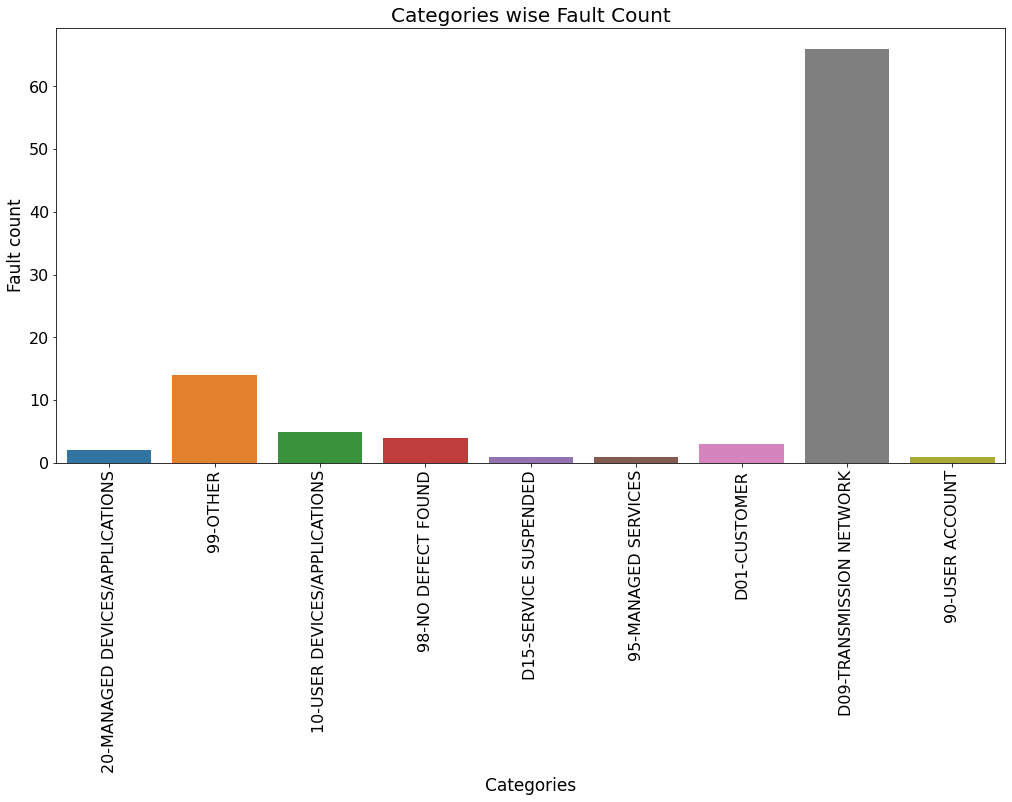

In [276]:
plt.figure(figsize=(17,8))
sns.countplot(df17['category'])
plt.xlabel("Categories", fontsize=17)
plt.ylabel("Fault count", fontsize=17)
plt.title("Categories wise Fault Count", fontsize=20)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


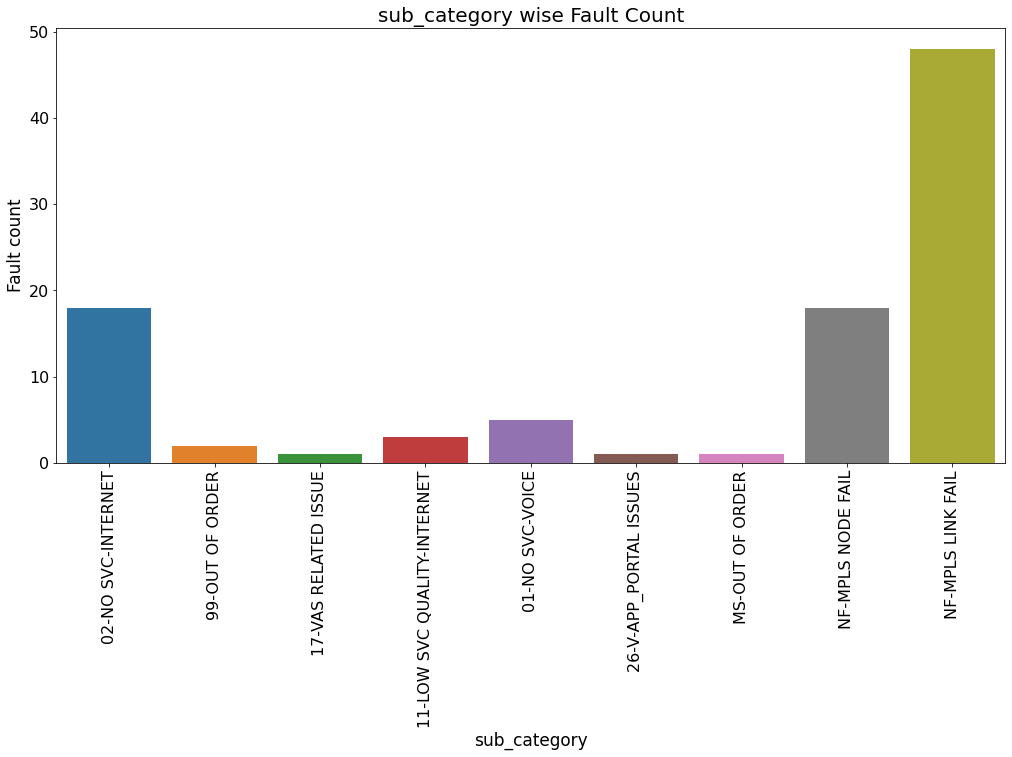

In [277]:
plt.figure(figsize=(17,8))
sns.countplot(df17['sub_category'])
plt.xlabel("sub_category", fontsize=17)
plt.ylabel("Fault count", fontsize=17)
plt.title("sub_category wise Fault Count", fontsize=20)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

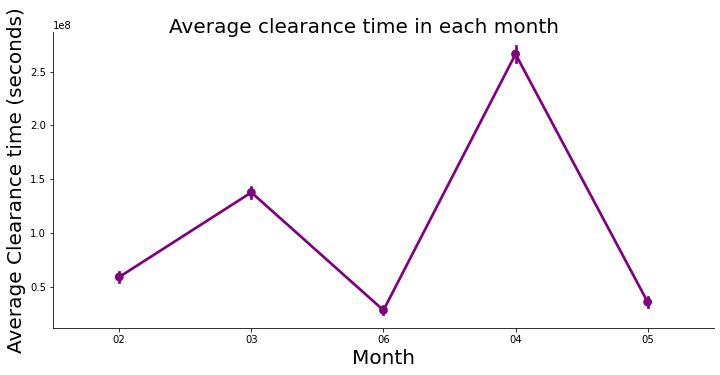

In [278]:
# Create the plot
for i,col in enumerate(['Cleared_time_month']):
    plt.figure(i)
    ax = sns.catplot(x=col, y='clearance_time_sum_seconds', data=df, kind='point', aspect=2, color='purple')

# Set the x-axis labels
#ax.set_xticklabels(["February", "March" ,"April","May","June"], fontsize=16)
#ax.set_yticklabels(fontsize=15)
# Add a title
plt.suptitle("Average clearance time in each month", fontsize=20)

# Increase the font size of the y-axis label
plt.ylabel("Average Clearance time (seconds)", fontsize=20)
plt.xlabel("Month", fontsize=20)

plt.show()

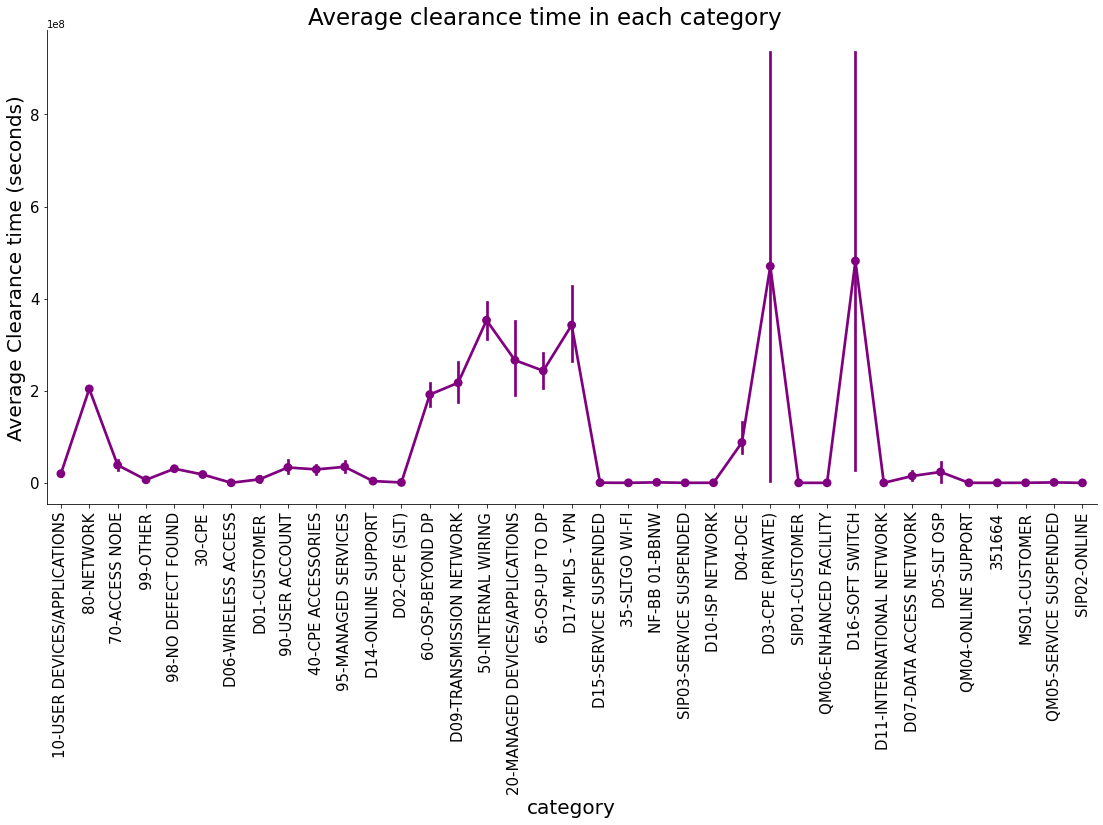

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

for i,col in enumerate(['category']):
    ax = sns.catplot(x=col, y='clearance_time_sum_seconds', data=df, kind='point', aspect=2, color='purple')
    plt.xticks(rotation=90)

plt.suptitle("Average clearance time in each category", fontsize=23)
plt.ylabel("Average Clearance time (seconds)", fontsize=20)
plt.xlabel("category", fontsize=20)
plt.tick_params(labelsize=15)
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()


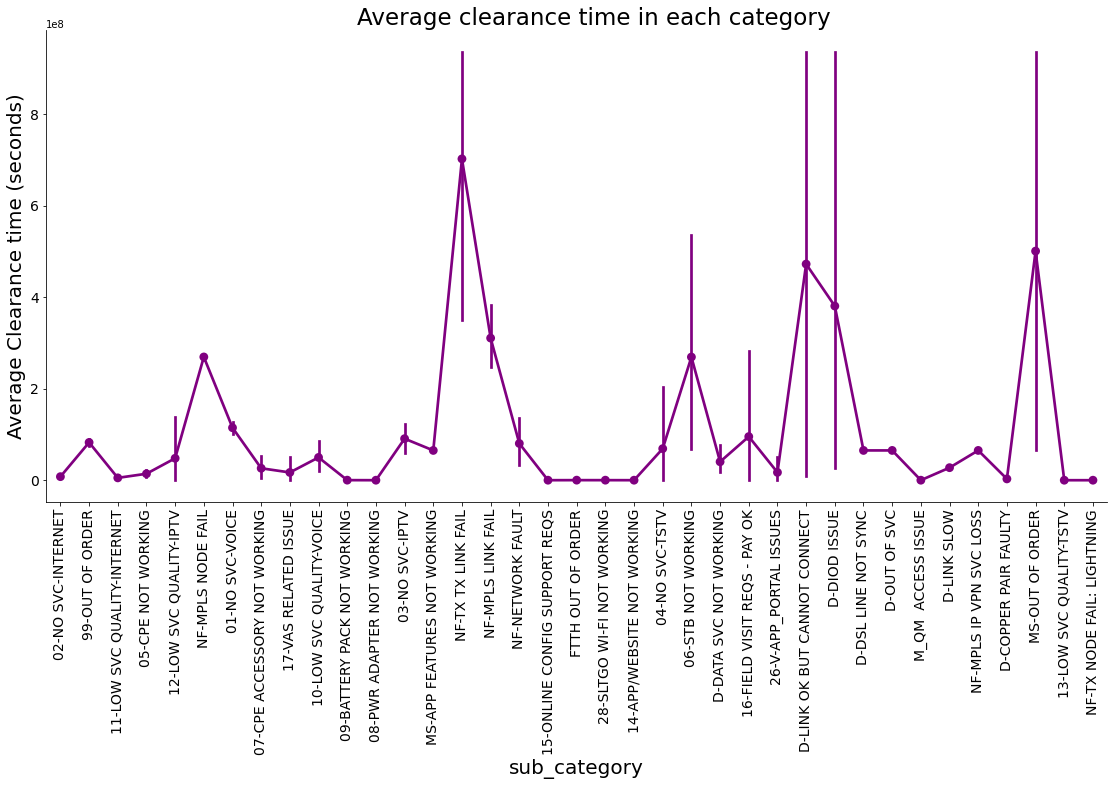

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

for i,col in enumerate(['sub_category']):
    ax = sns.catplot(x=col, y='clearance_time_sum_seconds', data=df, kind='point', aspect=2, color='purple')
    plt.xticks(rotation=90)

plt.suptitle("Average clearance time in each category", fontsize=23)
plt.ylabel("Average Clearance time (seconds)", fontsize=20)
plt.xlabel("sub_category", fontsize=20)
plt.tick_params(labelsize=14)
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()

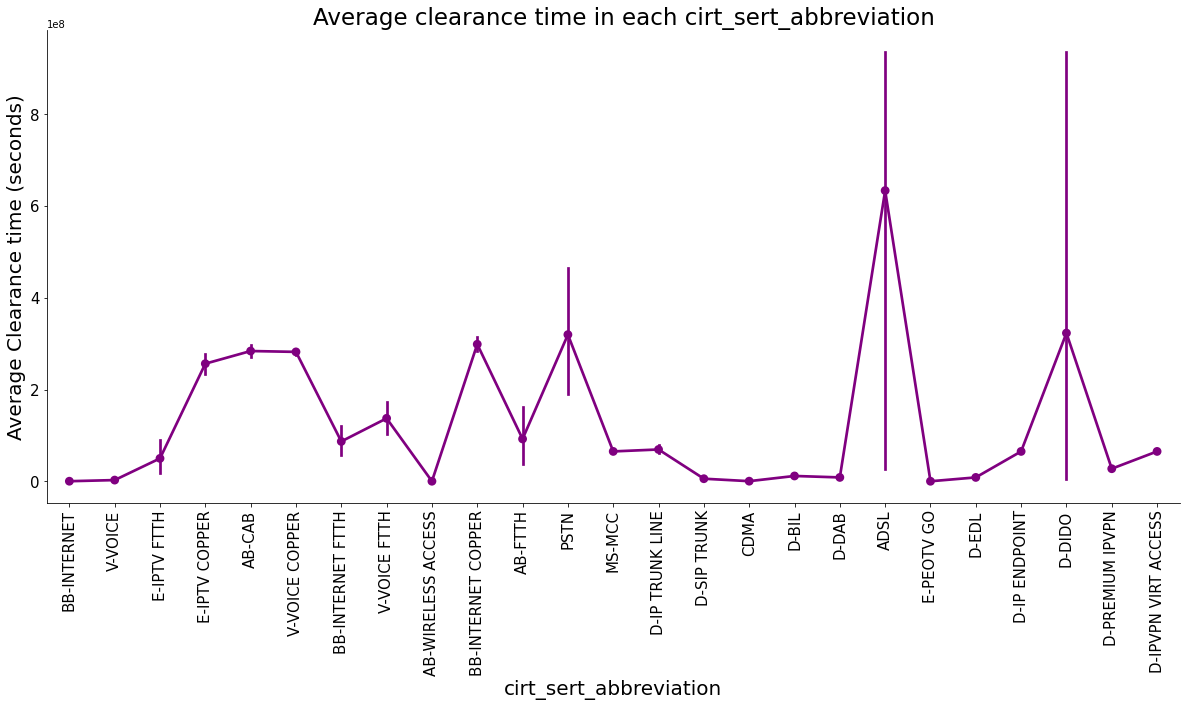

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

for i,col in enumerate(['cirt_sert_abbreviation']):
    ax = sns.catplot(x=col, y='clearance_time_sum_seconds', data=df, kind='point', aspect=2, color='purple')
    plt.xticks(rotation=90)

plt.suptitle("Average clearance time in each cirt_sert_abbreviation", fontsize=23)
plt.ylabel("Average Clearance time (seconds)", fontsize=20)
plt.xlabel("cirt_sert_abbreviation", fontsize=20)
plt.tick_params(labelsize=15)
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()

In [282]:
df.head()

,accnumber_HASH,event_source,faultRef_HASH,opmc_name,lea_code,cirt_sert_abbreviation,fault_in,sub_category,category,cleared_time,...,timeDiff,event_source_faultRef_HASH_count,accnumber_HASH_fault_count_average,clearance_time_max,clearance_time_sum,event_source_clearance_time_seconds_sum,clearance_time_avg,clearance_time_max_seconds,clearance_time_sum_seconds,timeDiff_range
0,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,1bbe5642b3e5732ddb790772abe0a66f2d28df9145359b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-17 16:50:36,...,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01,28381.0,28381.0,14759.0,28381.0,within 1st month
1,684948f8b2192907af9d25ce7fa9484cf40ffd32bdb259...,94113660615,665a19efc19b436a8ee386894dbcb767e937fd9d869a9b...,HO,MHG,BB-INTERNET,101-WEB SITE/APPLICATION DOWN/BLOCKED,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-11 15:08:31,...,within 1st day,2,2.0,0 days 04:05:59,0 days 07:53:01,28381.0,28381.0,14759.0,28381.0,within 1st month
2,b45b1f3edf18b03aa72fa692d8f292c5dfead42d7ff1c3...,0113452865,d6678ea2c6b50d209b0ba009fd7727e7e58448fd8f367c...,BIA,KI,V-VOICE,802-POOR SIGNAL STRENGTH,99-OUT OF ORDER,80-NETWORK,2022-02-21 09:29:32,...,within 1st day,3,3.0,0 days 23:35:41,1 days 18:35:19,153319.0,153319.0,84941.0,153319.0,within 1st month
3,5a4f1b47bb59d40828be0225917f3bc53da2d9026f7f9b...,94113621242,8278e32ba45cac769d9921e8ff440ddc6f262c194eff43...,KX,KX,BB-INTERNET,109-FAULTY OTHER CUSTOMER DEVICES,02-NO SVC-INTERNET,10-USER DEVICES/APPLICATIONS,2022-02-14 10:35:26,...,within 1st day,3,3.0,0 days 16:56:06,1 days 04:35:28,102928.0,102928.0,60966.0,102928.0,within 1st month
4,593000f3e6de54bd235dd3400d08196d6870222b8332f5...,94913132423,633bce33f627f1218355b25d5d0a87ae1ccf2f6c254fbb...,GL,UM,BB-INTERNET,701-PORT STUCK,11-LOW SVC QUALITY-INTERNET,70-ACCESS NODE,2022-02-10 09:32:08,...,within 1st day,1,1.0,0 days 16:50:13,0 days 16:50:13,60613.0,60613.0,60613.0,60613.0,within 1st month


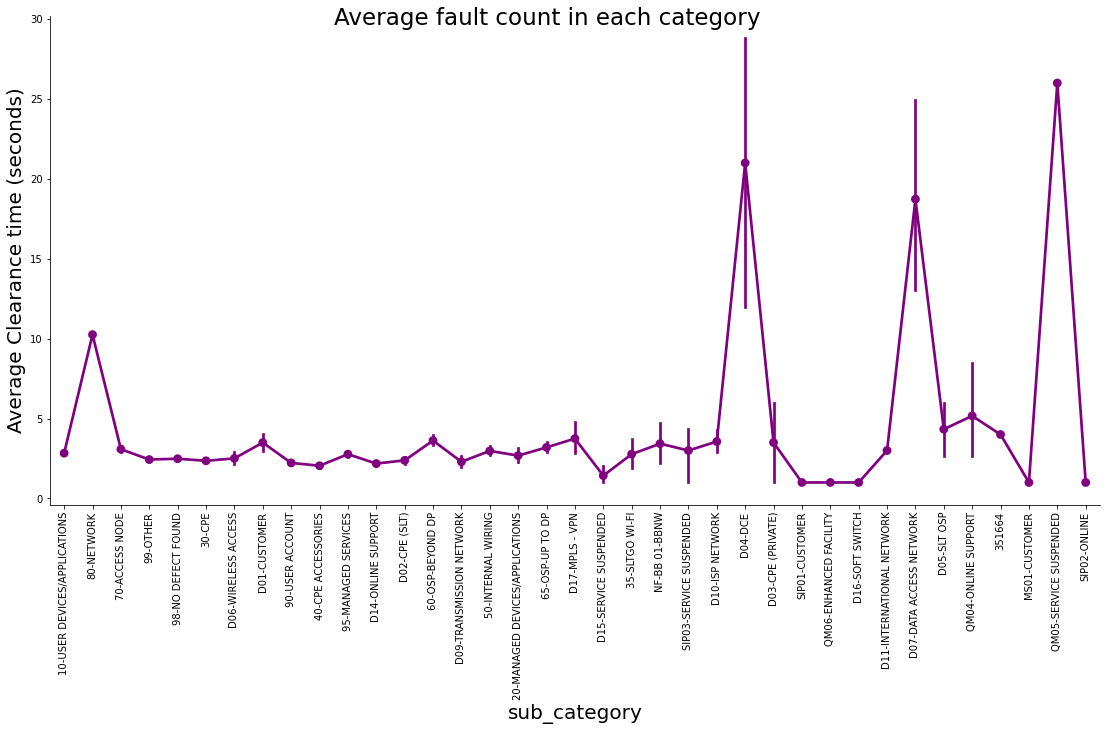

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

for i,col in enumerate(['category']):
    ax = sns.catplot(x=col, y='event_source_faultRef_HASH_count', data=df, kind='point', aspect=2, color='purple')
    plt.xticks(rotation=90)

plt.suptitle("Average fault count in each category", fontsize=23)
plt.ylabel("Average Clearance time (seconds)", fontsize=20)
plt.xlabel("sub_category", fontsize=20)
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()

In [284]:
df.cirt_sert_abbreviation.value_counts()

BB-INTERNET            19900
V-VOICE COPPER         11597
V-VOICE                 4617
AB-CAB                  3331
BB-INTERNET COPPER      2874
E-IPTV COPPER           1231
V-VOICE FTTH             338
BB-INTERNET FTTH         274
D-IP TRUNK LINE          258
E-IPTV FTTH              120
AB-FTTH                   64
AB-WIRELESS ACCESS        44
D-EDL                     37
PSTN                      36
D-PREMIUM IPVPN           16
D-SIP TRUNK                9
D-BIL                      6
D-IP ENDPOINT              6
D-DAB                      5
MS-MCC                     4
E-PEOTV GO                 3
ADSL                       3
D-DIDO                     3
CDMA                       1
D-IPVPN VIRT ACCESS        1
Name: cirt_sert_abbreviation, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


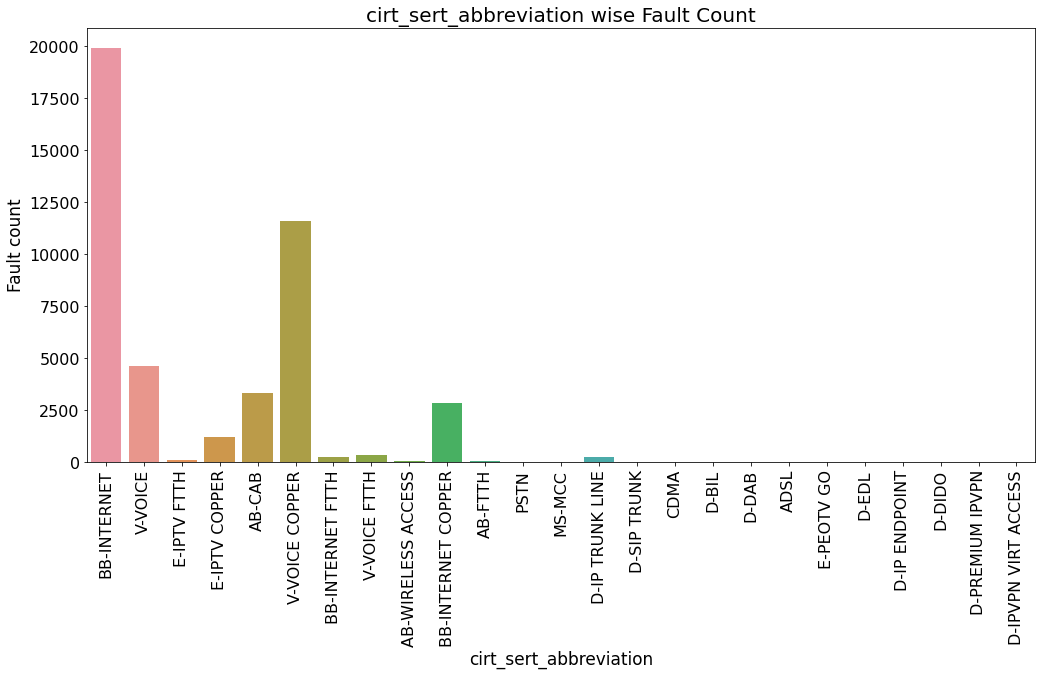

In [285]:
plt.figure(figsize=(17,8))
sns.countplot(df['cirt_sert_abbreviation'])
plt.xlabel("cirt_sert_abbreviation", fontsize=17)
plt.ylabel("Fault count", fontsize=17)
plt.title("cirt_sert_abbreviation wise Fault Count", fontsize=20)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.show()

In [286]:
df.category.unique()

array(['10-USER DEVICES/APPLICATIONS', '80-NETWORK', '70-ACCESS NODE',
       '99-OTHER', '98-NO DEFECT FOUND', '30-CPE', 'D06-WIRELESS ACCESS',
       'D01-CUSTOMER', '90-USER ACCOUNT', '40-CPE ACCESSORIES',
       '95-MANAGED SERVICES', 'D14-ONLINE SUPPORT', 'D02-CPE (SLT)',
       '60-OSP-BEYOND DP', 'D09-TRANSMISSION NETWORK',
       '50-INTERNAL WIRING', '20-MANAGED DEVICES/APPLICATIONS',
       '65-OSP-UP TO DP', 'D17-MPLS - VPN', 'D15-SERVICE SUSPENDED',
       '35-SLTGO WI-FI', 'NF-BB 01-BBNW', 'SIP03-SERVICE SUSPENDED',
       'D10-ISP NETWORK', 'D04-DCE', 'D03-CPE (PRIVATE)',
       'SIP01-CUSTOMER', 'QM06-ENHANCED FACILITY', 'D16-SOFT SWITCH',
       'D11-INTERNATIONAL NETWORK', 'D07-DATA ACCESS NETWORK',
       'D05-SLT OSP', nan, 'QM04-ONLINE SUPPORT', '351664',
       'MS01-CUSTOMER', 'QM05-SERVICE SUSPENDED', 'SIP02-ONLINE'],
      dtype=object)

In [287]:
df.category.value_counts()

80-NETWORK                         22401
30-CPE                              4686
98-NO DEFECT FOUND                  4390
99-OTHER                            3730
10-USER DEVICES/APPLICATIONS        2371
70-ACCESS NODE                      1281
95-MANAGED SERVICES                  848
40-CPE ACCESSORIES                   809
60-OSP-BEYOND DP                     777
90-USER ACCOUNT                      600
D14-ONLINE SUPPORT                   509
50-INTERNAL WIRING                   470
65-OSP-UP TO DP                      392
D01-CUSTOMER                         385
D02-CPE (SLT)                        314
D09-TRANSMISSION NETWORK             255
D06-WIRELESS ACCESS                  195
D17-MPLS - VPN                       102
20-MANAGED DEVICES/APPLICATIONS      100
D10-ISP NETWORK                       50
NF-BB 01-BBNW                         21
D07-DATA ACCESS NETWORK               15
D15-SERVICE SUSPENDED                 14
35-SLTGO WI-FI                        13
D05-SLT OSP     

In [288]:
df.sub_category.unique()

array(['02-NO SVC-INTERNET', '99-OUT OF ORDER',
       '11-LOW SVC QUALITY-INTERNET', '05-CPE NOT WORKING',
       '12-LOW SVC QUALITY-IPTV', 'NF-MPLS NODE FAIL', '01-NO SVC-VOICE',
       '07-CPE ACCESSORY NOT WORKING', '17-VAS RELATED ISSUE',
       '10-LOW SVC QUALITY-VOICE', '09-BATTERY PACK NOT WORKING',
       '08-PWR ADAPTER NOT WORKING', '03-NO SVC-IPTV',
       'MS-APP FEATURES NOT WORKING', 'NF-TX TX LINK FAIL',
       'NF-MPLS LINK FAIL', 'NF-NETWORK FAULT',
       '15-ONLINE CONFIG SUPPORT REQS', 'FTTH OUT OF ORDER',
       '28-SLTGO WI-FI NOT WORKING', '14-APP/WEBSITE NOT WORKING',
       '04-NO SVC-TSTV', '06-STB NOT WORKING', 'D-DATA SVC NOT WORKING',
       '16-FIELD VISIT REQS - PAY OK', '26-V-APP_PORTAL ISSUES',
       'D-LINK OK BUT CANNOT CONNECT', 'D-DIOD ISSUE',
       'D-DSL LINE NOT SYNC', 'D-OUT OF SVC', 'M_QM  ACCESS ISSUE',
       'D-LINK SLOW', 'NF-MPLS IP VPN SVC LOSS', 'D-COPPER PAIR FAULTY',
       'MS-OUT OF ORDER', '13-LOW SVC QUALITY-TSTV',
       'NF-

In [289]:
df.sub_category.value_counts()

NF-MPLS NODE FAIL                16850
02-NO SVC-INTERNET               16096
99-OUT OF ORDER                   5942
01-NO SVC-VOICE                   2042
11-LOW SVC QUALITY-INTERNET       1705
05-CPE NOT WORKING                 819
03-NO SVC-IPTV                     291
07-CPE ACCESSORY NOT WORKING       180
10-LOW SVC QUALITY-VOICE           152
09-BATTERY PACK NOT WORKING        151
NF-MPLS LINK FAIL                  149
NF-NETWORK FAULT                    91
08-PWR ADAPTER NOT WORKING          76
D-DATA SVC NOT WORKING              57
17-VAS RELATED ISSUE                56
12-LOW SVC QUALITY-IPTV             21
06-STB NOT WORKING                  14
15-ONLINE CONFIG SUPPORT REQS       14
04-NO SVC-TSTV                      14
14-APP/WEBSITE NOT WORKING          11
16-FIELD VISIT REQS - PAY OK        10
NF-TX TX LINK FAIL                   8
FTTH OUT OF ORDER                    4
28-SLTGO WI-FI NOT WORKING           4
26-V-APP_PORTAL ISSUES               3
D-DIOD ISSUE             

In [290]:
df.dtypes

accnumber_HASH                                      object
event_source                                        object
faultRef_HASH                                       object
opmc_name                                           object
lea_code                                            object
cirt_sert_abbreviation                              object
fault_in                                            object
sub_category                                        object
category                                            object
cleared_time                                datetime64[ns]
reported_time                               datetime64[ns]
ym                                                   int64
clearance_time                             timedelta64[ns]
clearance_time_seconds                             float64
clearance_time_days                                  int64
reported_year                                        int64
Cleared_year                                         int